### ST443 Group 1 - Task 1

The first part of this project involves applying statistical machine learning techniques to a binary classification problem, using the dataset provided on Moodle as a compressed CSV file, `data1.csv.gz`.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [95]:
data1 = pd.read_csv('data1.csv.gz', compression='gzip')

### **T1.1** Explore the data to generate summary statistics and plots that help the reader understand the data, with a focus on information relevant to the classification task.

In [4]:
data1

,label,DPM1,NIPAL3,KRIT1,LAP3,CD99,MAD1L1,LASP1,M6PR,CFLAR,...,CISD3,DDX52,GGNBP2,C11orf98,MRPL45,TRG.AS1,EBLN3P,TRBV7.2,AC010642.2,POLR2J3.1
0,TREG,0.000000,0.0,0.000000,0.00000,4.459588,0.000000,4.175754,3.107406,3.107406,...,0.000000,0.000000,0.000000,3.777941,0.000000,0.000000,0.000000,0.000000,3.107406,0.000000
1,TREG,0.000000,0.0,0.000000,0.00000,3.159469,3.159469,0.000000,0.000000,3.159469,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.484917,0.000000,0.000000
2,CD4+T,3.568377,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.568377,0.000000,0.000000,0.000000,0.000000
3,CD4+T,2.574454,0.0,0.000000,0.00000,3.228759,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.574454,0.000000,0.000000,2.574454,0.000000,2.574454,0.000000,0.000000,2.574454
4,CD4+T,0.000000,0.0,0.000000,0.00000,0.000000,3.418392,0.000000,0.000000,0.000000,...,2.757484,0.000000,3.418392,0.000000,0.000000,2.757484,3.418392,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5466,CD4+T,2.786860,0.0,0.000000,2.78686,2.786860,2.786860,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.448715,0.000000,0.000000,0.000000
5467,TREG,0.000000,0.0,2.804178,0.00000,3.861582,0.000000,0.000000,0.000000,2.804178,...,0.000000,0.000000,3.466579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.804178
5468,TREG,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,2.953102,2.953102,...,0.000000,0.000000,0.000000,0.000000,2.953102,0.000000,0.000000,0.000000,0.000000,3.619814
5469,CD4+T,0.000000,0.0,0.000000,0.00000,4.067406,3.391236,3.391236,3.391236,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.391236,0.000000,0.000000,0.000000


In [6]:
# display basic info
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5471 entries, 0 to 5470
Columns: 4124 entries, label to POLR2J3.1
dtypes: float64(4123), object(1)
memory usage: 172.1+ MB
None


In [7]:
# get number of cells that are CD4+T and TREG
cell_counts = data1.iloc[:, 0].value_counts()
print(cell_counts)

label
CD4+T    3356
TREG     2115
Name: count, dtype: int64


In [8]:
# generate summary statistics
summary_stats = data1.describe()
print(summary_stats)

              DPM1       NIPAL3        KRIT1         LAP3         CD99  \
count  5471.000000  5471.000000  5471.000000  5471.000000  5471.000000   
mean      0.632655     0.503041     0.451158     0.871690     2.138707   
std       1.195156     1.099875     1.046742     1.356735     1.683733   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     2.833816   
75%       0.000000     0.000000     0.000000     2.328390     3.506334   
max       4.568712     4.581066     4.574394     5.012749     5.909840   

            MAD1L1        LASP1         M6PR        CFLAR         RBM5  ...  \
count  5471.000000  5471.000000  5471.000000  5471.000000  5471.000000  ...   
mean      1.360206     0.839459     1.603090     0.746686     0.870803  ...   
std       1.570032     1.335953     1.672090     1.322387     1.368219  ...   
min       0.00000

In [ ]:
# understanding collinearity
c = data1.drop(columns=['label']).corr()

# extract upper triangle
c = c.where(np.triu(np.ones(c.shape, dtype=bool), k=1))

c[(c >= 0.7)&(c<1)].stack().reset_index(name='cor')

# collinearity does not affect the model prediction or the accuracy of the model
# collinearity only affects the variance of coefficient estimates and the p-values
# it affects the interpretability of the model, not the ability of the model to predict

,level_0,level_1,cor
0,MT.ND4L,MT.ATP8,0.791423
1,PTPRCAP,EEF1G,0.702974


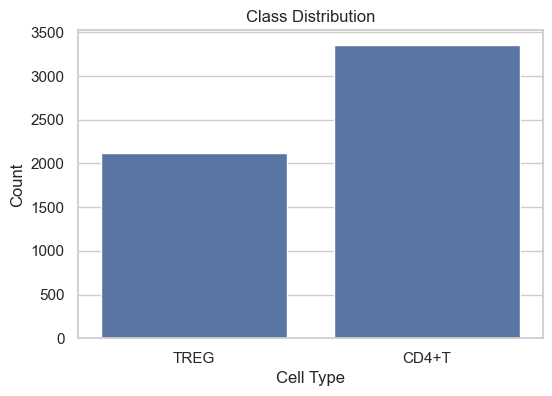

In [19]:
# plot number of cells that are CD4+T and TREG
plt.figure(figsize=(6, 4))
sns.countplot(x=data1.iloc[:, 0])
plt.title('Class Distribution')
plt.xlabel('Cell Type')
plt.ylabel('Count')
plt.show()

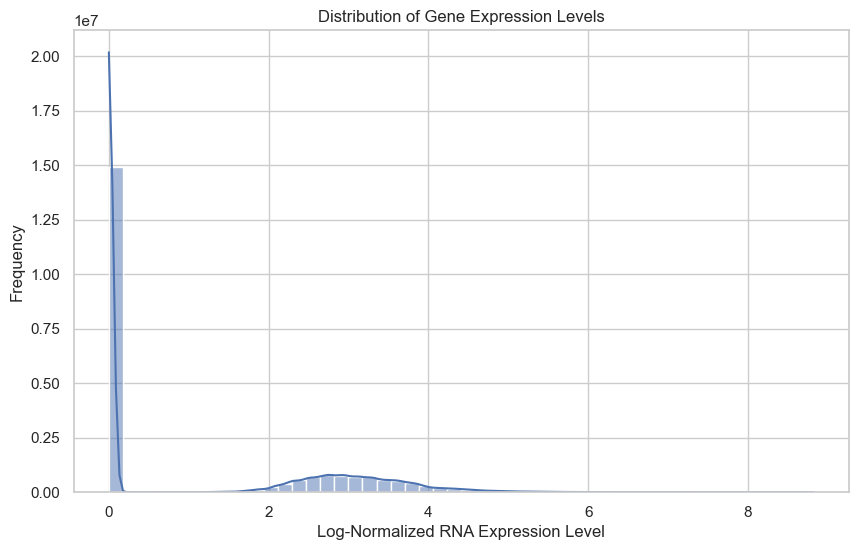

In [20]:
# visualize data distribution
plt.figure(figsize=(10, 6))
sns.histplot(data1.iloc[:, 1:].values.flatten(), bins=50, kde=True)
plt.title('Distribution of Gene Expression Levels')
plt.xlabel('Log-Normalized RNA Expression Level')
plt.ylabel('Frequency')
plt.show()

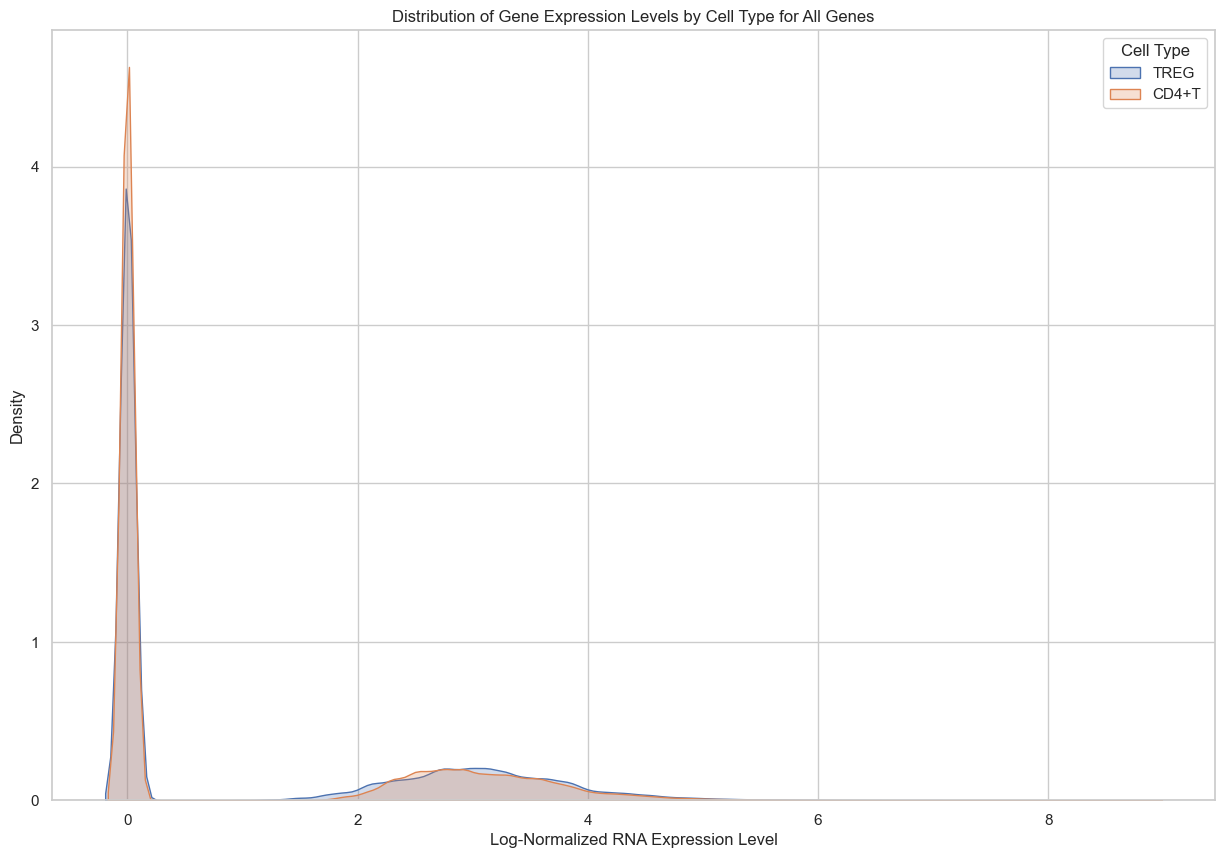

In [21]:
# distribution of gene expression levels by cell type for all genes
plt.figure(figsize=(15, 10))
for cell_type in data1.iloc[:, 0].unique():
    subset = data1[data1.iloc[:, 0] == cell_type].iloc[:, 1:]
    sns.kdeplot(subset.values.flatten(), label=cell_type, fill=True, common_norm=False)

plt.title('Distribution of Gene Expression Levels by Cell Type for All Genes')
plt.xlabel('Log-Normalized RNA Expression Level')
plt.ylabel('Density')
plt.legend(title='Cell Type')
plt.show()

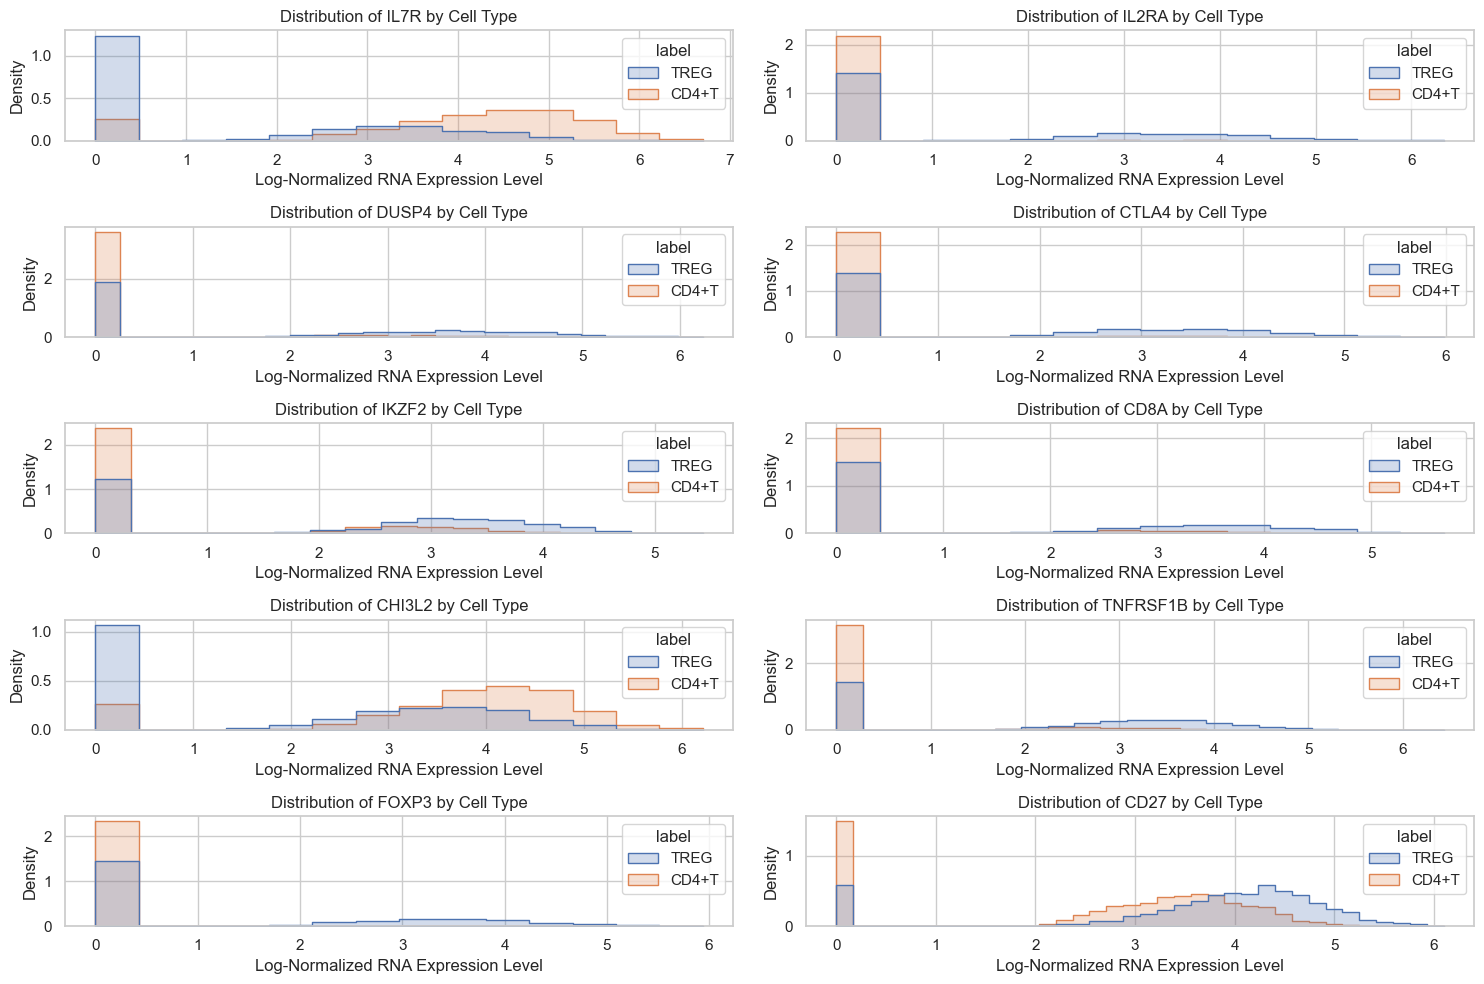

In [22]:
# list of most important genes (based on random forest results)
genes = ['IL7R', 'IL2RA', 'DUSP4', 'CTLA4', 'IKZF2', 'CD8A', 'CHI3L2', 'TNFRSF1B', 'FOXP3', 'CD27']

# distribution of gene expression levels by cell type
plt.figure(figsize=(15, 10))
for i, gene in enumerate(genes):
    plt.subplot(5, 2, i+1)
    sns.histplot(data1, x=gene, hue=data1.iloc[:, 0], element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of {gene} by Cell Type')
    plt.xlabel('Log-Normalized RNA Expression Level')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [96]:
# scatter plot first 2 PCAs and color by class
# for the whole dataset
from sklearn.preprocessing import StandardScaler

features = data1.drop(columns=['label'])

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

pca = PCA(n_components=10)
pca_components = pca.fit_transform(features_scaled)
pca_df = pd.DataFrame(data=pca_components, columns=[f'PCA{i+1}' for i in range(10)])
pca_df['label'] = data1['label']

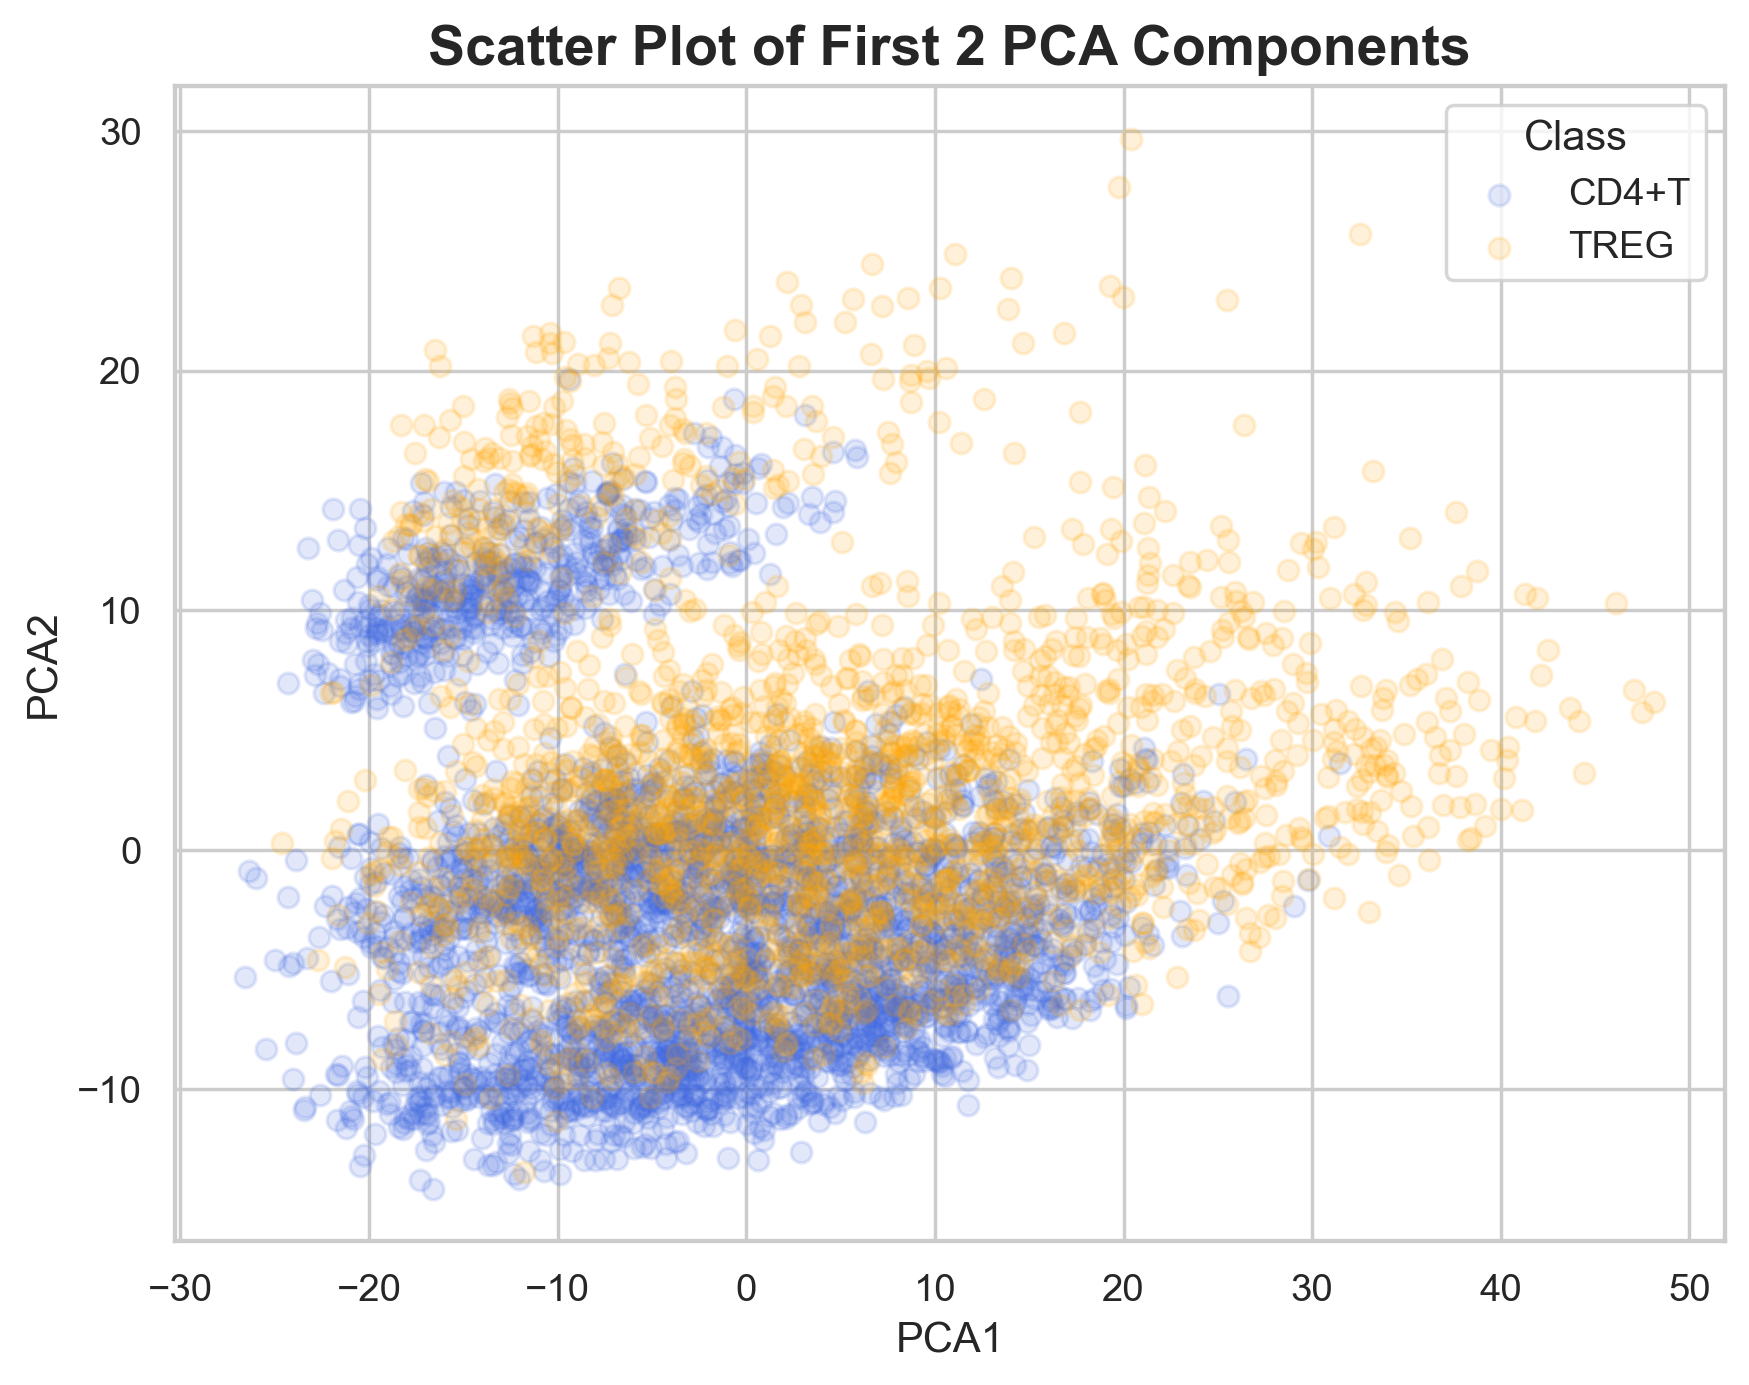

In [97]:
# plot
plt.figure(figsize=(8, 6), dpi=250)
# custom colors for each class
for label, color in zip(['CD4+T', 'TREG'], ['royalblue', 'orange']):
    subset = pca_df[pca_df['label'] == label]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'{label}', color=color, alpha=0.15)

plt.title('Scatter Plot of First 2 PCA Components', fontsize=16, fontweight='bold')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Class')
plt.grid(True)
plt.show()

### **T1.2** Train and evaluate the following classifiers (covered in the course):
- Linear Discriminant Analysis (LDA)
- Logistic classifier
- Quadratic Discriminant Analysis (QDA)
- Nearest Neighbor Classifier (k-NN)
- Gradient Boosting Decision Trees (GBDT) 
- Random Forest
- Support Vector Machine (SVM).

Additionally, train and evaluate these classifiers using PCA with 10 components.

<br>

Label classes: Define TREG as the positive class and CD4+T as the negative class.

Evaluation metrics: Use accuracy, balanced accuracy, AUC, F1 score, ROC.

In [ ]:
# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# classifiers
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC

# CV
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# evaluation metrics
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, 
                             f1_score, roc_curve, roc_auc_score, auc)

##### Preprocessing:

In [ ]:
# preprocessing
data1['label'] = data1['label'].map({'TREG': 1, 'CD4+T': 0})

# split into train/test sets - 80/20
X = data1.drop(columns=['label'])
y = data1['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=443)

# standardize features
    # necessary for k-nn, svm but useful for all models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# pca - 10 components
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
components = pca.components_

# rows: features
# columns: principal components
feature_importance = pd.DataFrame(
    components.T,
    # feature names
    index=X_train.columns, 
    columns=[f'PC{i+1}' for i in range(components.shape[0])])

print(feature_importance)

                 PC1       PC2       PC3       PC4       PC5       PC6  \
DPM1        0.009530  0.014022  0.017671 -0.012459 -0.023786  0.000351   
NIPAL3      0.006619 -0.001832 -0.017013 -0.007173 -0.013264  0.004760   
KRIT1       0.009944  0.000244 -0.009648 -0.007227 -0.000787 -0.004947   
LAP3        0.018561  0.019681  0.002741 -0.007497  0.001938 -0.025024   
CD99        0.028801 -0.016799  0.012899  0.011068  0.019129  0.000965   
...              ...       ...       ...       ...       ...       ...   
TRG.AS1     0.010333 -0.005174 -0.010339 -0.009396 -0.024886 -0.002759   
EBLN3P      0.005296  0.017759 -0.020933 -0.010668 -0.014460  0.012221   
TRBV7.2     0.011713 -0.010117 -0.025116  0.015834  0.007849  0.015285   
AC010642.2  0.013036 -0.009381  0.011670  0.001846 -0.020564  0.009284   
POLR2J3.1  -0.006743  0.034858  0.014507 -0.025926 -0.025703  0.000624   

                 PC7       PC8       PC9      PC10  
DPM1       -0.007242 -0.007813 -0.002970  0.009333  
NIPAL

In [6]:
sorted_pc1_importance = feature_importance['PC1'].abs().sort_values(ascending=False)
print(f"Most important features for PC1: \n {sorted_pc1_importance.head(10)}")

Most important features for PC1: 
 MIF        0.042464
ALDOA      0.039775
TUBA1B     0.039207
TYMS       0.037705
MT.ATP8    0.036614
COX5A      0.035876
HMGB2      0.035517
PPIA       0.035412
PFN1       0.035405
NME2       0.035192
Name: PC1, dtype: float64


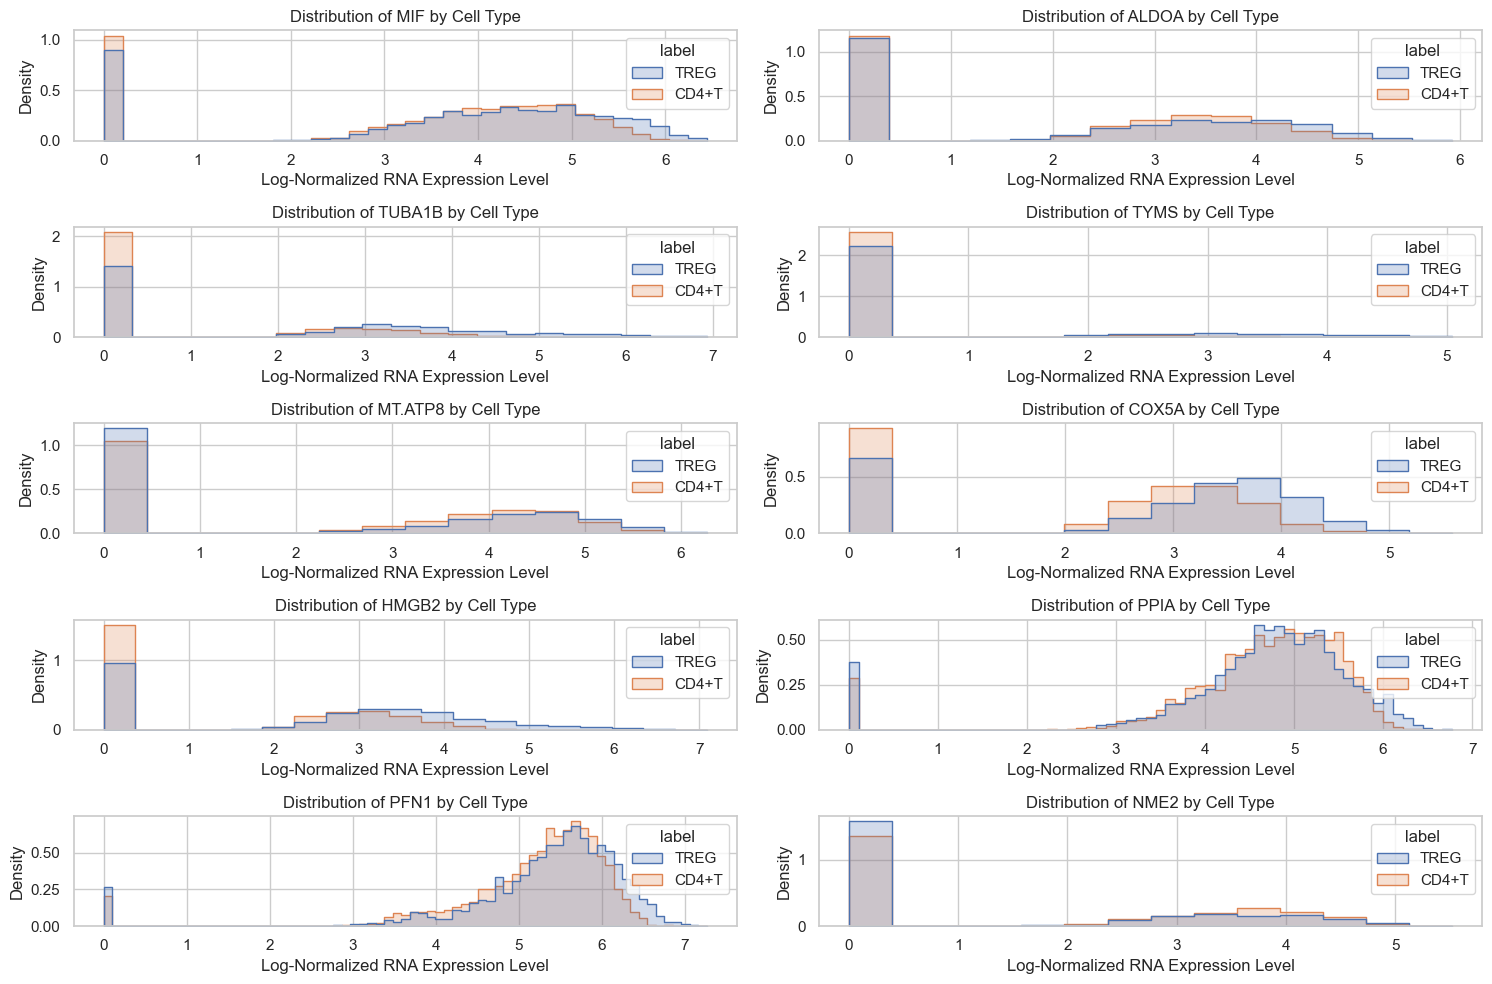

In [ ]:
# list of most important genes (based on PCA first component)
genes = ['MIF', 'ALDOA', 'TUBA1B', 'TYMS', 'MT.ATP8', 'COX5A', 'HMGB2', 'PPIA', 'PFN1', 'NME2']

# distribution of gene expression levels by cell type
plt.figure(figsize=(15, 10))
for i, gene in enumerate(genes):
    plt.subplot(5, 2, i+1)
    sns.histplot(data1, x=gene, hue=data1.iloc[:, 0], element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of {gene} by Cell Type')
    plt.xlabel('Log-Normalized RNA Expression Level')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

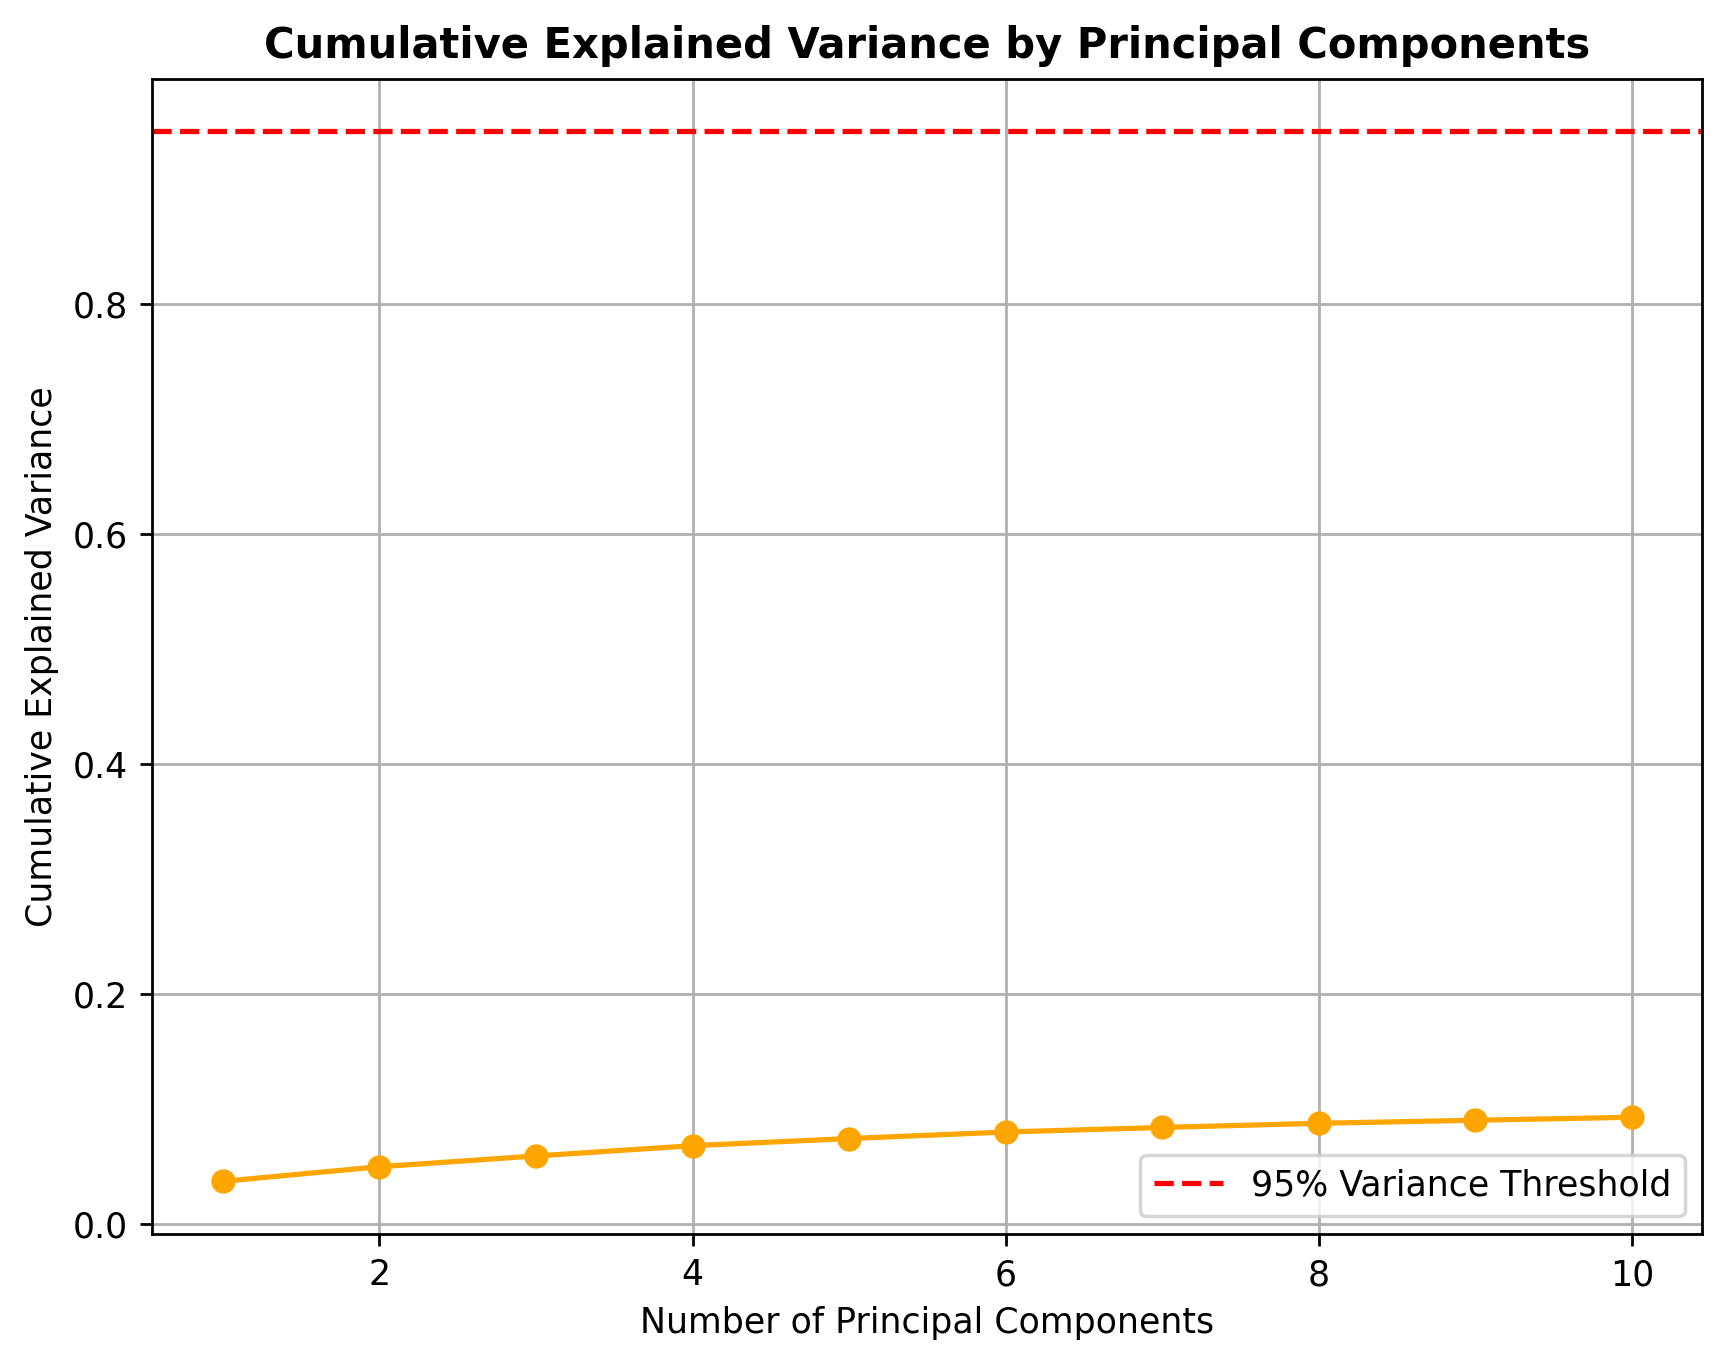

In [ ]:
explained_variance = pca.explained_variance_ratio_
# computing cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# plot cumulative explained variance by number of principal component
plt.figure(figsize=(8, 6), dpi=250)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange')
# include 95% variance line
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Threshold")
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components', fontweight='bold')
plt.legend()

plt.grid(True)
plt.show()

##### Functions:

In [ ]:
# 1. function to extract performance metrics from best grid search estimator
def eval_cv(grid):
    mean_acc = grid.cv_results_['mean_test_accuracy'][grid.best_index_]
    print(f"Mean Accuracy: {mean_acc:.4f}")

    mean_balanced_acc = grid.cv_results_['mean_test_balanced_accuracy'][grid.best_index_]
    print(f"Mean Balanced Accuracy: {mean_balanced_acc:.4f}")

    mean_auc = grid.cv_results_['mean_test_roc_auc'][grid.best_index_]
    print(f"Mean AUC: {mean_auc:.4f}")

    mean_f1 = grid.cv_results_['mean_test_f1'][grid.best_index_]
    print(f"Mean F1 Score: {mean_f1:.4f}")

# 2. function to evaluate the model on the test set and print metrics
def evaluate_model(y_test, y_pred, y_pred_proba):

    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred)

    # round all metrics to 4 decimals
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"F1 Score: {f1:.4f}")

# 3. function to automate plotting ROC curves
def plot_all_roc_curves(probs_dict, y, type_data):

    plt.figure(figsize=(10, 8), dpi=300)

    # loop over model results
    for name, y_prob in probs_dict.items():
        if y_prob is not None:
            fpr, tpr, _ = roc_curve(y, y_prob)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')
    
    # naive model
    plt.plot([0, 1], [0, 1], 'k--')

    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f"ROC Curves for {type_data} Data", fontsize=17, fontweight='bold')
    plt.legend(loc='lower right')

    plt.grid()
    plt.show()

##### Scoring the Models:

In [104]:
# define custom scoring metrics for all models
scoring = {'accuracy': 'accuracy',
    'roc_auc': 'roc_auc',
    'balanced_accuracy': make_scorer(balanced_accuracy_score),
    'f1': make_scorer(f1_score)}

##### Fitting the Models:

Below is an example of a function I could use to automate training and evaluation of all the models.

Instead of implementing a single function to automate model fitting and evaluation, I’ve chosen not to do so because:

- I want flexibility to explore specific aspects of the models, such as plotting optimal parameters (e.g., K-NN neighbors or regularization values) and examining variable importance.
- For methods like LDA, the current dictionary handling does not immediately work with different parameter sequences and requires additional customization.

In [ ]:
classifiers = {
    "LDA": LinearDiscriminantAnalysis(),
    "LR": LogisticRegression(random_state=443),
    "QDA": QuadraticDiscriminantAnalysis(),
    "KNN": KNeighborsClassifier(),
    "GBDT": GradientBoostingClassifier(random_state=443),
    "RF": RandomForestClassifier(random_state=443),
    "SVM": SVC(random_state=443)}

def train_evaluate(classifier, data, params):
    
    # selecting training and test data
    if data=='PCA':
        X_train_set = X_train_pca
        X_test_set = X_test_pca
        x=f'{classifier} {data}'

    else:
        X_train_set = X_train_scaled
        X_test_set = X_test_scaled
        x=f'{classifier}'

    # initialize classifier
    model = classifiers[classifier]
    
    # run grid search
    grid_search= GridSearchCV(estimator=model, 
                           param_grid=params, 
                           scoring=scoring,
                           refit='f1',
                           cv=10)

    # fit to training
    grid_search.fit(X_train_set, y_train)

    # select best estimator
    best_model = grid_search.best_estimator_

    # print best params
    print(f"{x} - CV Best parameters: {grid_search.best_params_}")
    
    eval_cv(grid_search)

    # predict on the test set using best model
        # label
    y_pred_test = best_model.predict(X_test_set)
        # probability
    y_pred_proba_test = best_model.predict_proba(X_test_set)[:, 1]

    # print evaluation metrics
    print('\n\nTest Set Metrics:\n')
    evaluate_model(y_test, y_pred_test, y_pred_proba_test)
    
    return(y_pred_test, y_pred_proba_test)

1. LDA

In [ ]:
### LDA - initialization

# options for hyperparameters
# solver - svd (singular value decomposition) or lsqr(least squares solution)
# shrinkage - none, auto (using Ledoit-Wolfe lemma) or fixed 0.5
    # svd does not support any shrinkage

lda_param_grid = {
    'svd': {
        'solver': ['svd'],
        'shrinkage': [None]},
    'lsqr': {
        'solver': ['lsqr'],
        'shrinkage': ['auto', 0.5]}}

# initialize model 
lda_model = LinearDiscriminantAnalysis()

# custom scoring function for f1-score
f1_scorer = make_scorer(f1_score)

In [ ]:
# LDA - original data

# initialize GridSearchCV with 10-fold cross-validation for svd solver
grid_search_svd = GridSearchCV(estimator=lda_model, 
                               param_grid=lda_param_grid['svd'], 
                               scoring=scoring,
                               refit='f1',
                               cv=10)

# same for lsqr solver
grid_search_lsqr = GridSearchCV(estimator=lda_model, 
                                param_grid=lda_param_grid['lsqr'], 
                                scoring=scoring,
                                refit='f1',
                                cv=10)

# fit GridSearchCV to training data
grid_search_svd.fit(X_train_scaled, y_train)
grid_search_lsqr.fit(X_train_scaled, y_train)

# compare models from grid search and select best
if grid_search_svd.best_score_ > grid_search_lsqr.best_score_:
    lda_best_model = grid_search_svd.best_estimator_
    best_params = grid_search_svd.best_params_
    best_score = grid_search_svd.best_score_
    grid = grid_search_svd
else:
    lda_best_model = grid_search_lsqr.best_estimator_
    best_params = grid_search_lsqr.best_params_
    best_score = grid_search_lsqr.best_score_
    grid = grid_search_lsqr

print(f'LDA Original - Best F1 Score: {best_score}')
print(f'LDA Original - Best Parameters: {best_params}')

LDA Original - Best F1 Score: 0.9298664058141171
LDA Original - Best Parameters: {'shrinkage': 0.5, 'solver': 'lsqr'}


In [ ]:
eval_cv(grid)

Mean Accuracy: 0.9479
Mean Balanced Accuracy: 0.9388
Mean AUC: 0.9883
Mean F1 Score: 0.9299


In [119]:
# predict on the test set using best model
# label
lda_y_pred_test = lda_best_model.predict(X_test_scaled)
# probability
lda_y_pred_proba_test = lda_best_model.predict_proba(X_test_scaled)[:, 1]

# print evaluation metrics
evaluate_model(y_test, lda_y_pred_test, lda_y_pred_proba_test)

Accuracy: 0.9598
Balanced Accuracy: 0.9548
AUC: 0.9916
F1 Score: 0.9484


In [ ]:
# LDA - PCA data

# same parameter grid
# same model
# same scoring function 

# initialize GridSearchCV with 10-fold cross-validation for svd solver
grid_search_svd = GridSearchCV(estimator=lda_model, 
                               param_grid=lda_param_grid['svd'], 
                               scoring=scoring,
                               refit='f1', 
                               cv=10)

# same for lsqr solver
grid_search_lsqr = GridSearchCV(estimator=lda_model, 
                                param_grid=lda_param_grid['lsqr'], 
                                scoring=scoring,
                                refit='f1',
                                cv=10)

# fit GridSearchCV to training data
grid_search_svd.fit(X_train_pca, y_train)
grid_search_lsqr.fit(X_train_pca, y_train)

# compare models from grid search and select best
if grid_search_svd.best_score_ > grid_search_lsqr.best_score_:
    lda_pca_best_model = grid_search_svd.best_estimator_
    best_params = grid_search_svd.best_params_
    best_score = grid_search_svd.best_score_
    grid_pca = grid_search_svd
else:
    lda_pca_best_model = grid_search_lsqr.best_estimator_
    best_params = grid_search_lsqr.best_params_
    best_score = grid_search_lsqr.best_score_
    grid_pca = grid_search_lsqr

print(f'LDA PCA - Best F1 Score: {best_score}')
print(f'LDA PCA - Best Parameters: {best_params}')

LDA PCA - Best F1 Score: 0.9126115411062568
LDA PCA - Best Parameters: {'shrinkage': None, 'solver': 'svd'}


In [ ]:
eval_cv(grid_pca)

Mean Accuracy: 0.9372
Mean Balanced Accuracy: 0.9216
Mean AUC: 0.9874
Mean F1 Score: 0.9126


In [93]:
# predict on the test set using best model
# label
lda_pca_y_pred_test = lda_pca_best_model.predict(X_test_pca)
# probability
lda_pca_y_pred_proba_test = lda_pca_best_model.predict_proba(X_test_pca)[:, 1]

# print evaluation metrics
evaluate_model(y_test, lda_pca_y_pred_test, lda_pca_y_pred_proba_test)

Accuracy: 0.9434
Balanced Accuracy: 0.9329
AUC: 0.9902
F1 Score: 0.9251


2. Logistic Regression:

In [ ]:
### Logistic Regression - initialization

# options for hyperparameters
lr_param_grid = {
    # regularization strength
    'C': [0.0001, 0.001, 0.01, 0.1, 1],
    # lasso and ridge
    'penalty': [None, 'l1', 'l2'],
    # saga is faster solver that supports both l1 and l2 penalties
    # efficient for larger datasets 
    'solver': ['saga'],
    'class_weight': [None, 'balanced'],
    'max_iter':[100, 200]}

# initialize model 
log_reg = LogisticRegression(random_state=443)

In [ ]:
# Logistic Regression - original data

# same scorer - f1

# initialize GridSearchCV with 10-fold cross-validation
grid_search_lr = GridSearchCV(estimator=log_reg, 
                              param_grid=lr_param_grid,
                              scoring=scoring,
                              refit='f1', 
                               cv=10)

# fit GridSearchCV to training data
grid_search_lr.fit(X_train_scaled, y_train)

# select and save best model
lr_best_model = grid_search_lr.best_estimator_

print(f'LR Original - Best F1 Score: {grid_search_lr.best_score_}')
print(f'LR Original - Best Parameters: {grid_search_lr.best_params_}')

LR Original - Best F1 Score: 0.941350220023122
LR Original - Best Parameters: {'C': 0.001, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
eval_cv(grid_search_lr)

Mean Accuracy: 0.9559
Mean Balanced Accuracy: 0.9494
Mean AUC: 0.9918
Mean F1 Score: 0.9414


In [36]:
# predict on the test set using best model
# label
lr_y_pred_test = lr_best_model.predict(X_test_scaled)
# probability
lr_y_pred_proba_test = lr_best_model.predict_proba(X_test_scaled)[:, 1]

# print evaluation metrics
evaluate_model(y_test, lr_y_pred_test, lr_y_pred_proba_test)

Accuracy: 0.9598
Balanced Accuracy: 0.9568
AUC: 0.9938
F1 Score: 0.9490


In [ ]:
# Logistic Regression - PCA data

# same parameter grid
# same model
# same scoring function 

# initialize GridSearchCV with 10-fold cross-validation
grid_search_lr_pca = GridSearchCV(estimator=log_reg, 
                                  param_grid=lr_param_grid,
                                  scoring=scoring,
                                  refit='f1',
                                  cv=10)

# fit GridSearchCV to training data
grid_search_lr_pca.fit(X_train_pca, y_train)

# select and save best model
lr_pca_best_model = grid_search_lr_pca.best_estimator_

print(f'LR PCA - Best F1 Score: {grid_search_lr_pca.best_score_}')
print(f'LR PCA - Best Parameters: {grid_search_lr_pca.best_params_}')

LR PCA - Best F1 Score: 0.9339024650693533
LR PCA - Best Parameters: {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
eval_cv(grid_search_lr_pca)

Mean Accuracy: 0.9500
Mean Balanced Accuracy: 0.9445
Mean AUC: 0.9892
Mean F1 Score: 0.9340


In [40]:
# predict on the test set using best model
# label
lr_pca_y_pred_test = lr_pca_best_model.predict(X_test_pca)
# probability
lr_pca_y_pred_proba_test = lr_pca_best_model.predict_proba(X_test_pca)[:, 1]

# print evaluation metrics
evaluate_model(y_test, lr_pca_y_pred_test, lr_pca_y_pred_proba_test)

Accuracy: 0.9553
Balanced Accuracy: 0.9542
AUC: 0.9918
F1 Score: 0.9439


In [ ]:
# extract best model coefficients
log_reg_coefficients = lr_best_model.coef_

# convert to dataframe
feature_importance = pd.DataFrame(
    log_reg_coefficients.T,
    index=X_train.columns,
    columns=['Importance'])

# sort by (absolute) feature importance
sorted_feature_importance = feature_importance.reindex(
    feature_importance['Importance'].abs().sort_values(ascending=False).index)

print(sorted_feature_importance)

           Importance
IL7R    -1.200598e-01
GNG8     7.780189e-02
IKZF2    7.413011e-02
CD8A     7.266815e-02
PLN      6.670617e-02
...               ...
NUP50    1.675224e-05
CCDC14  -5.211356e-06
ST6GAL1 -2.432970e-06
PDHB    -9.514935e-07
ZNF217   6.595883e-07

[4123 rows x 1 columns]


3. QDA:

In [ ]:
### QDA initialization

# options for hyperparameters
qda_param_grid = {
    # helps to stabilize covariance matrix estimation by shrinking it
    'reg_param': [0, 0.01, 0.1, 0.5, 1]}

# initialize model 
qda_model = QuadraticDiscriminantAnalysis()

In [ ]:
# QDA - Original Data

# same scoring - f1

# initialize GridSearchCV with 10-fold cross-validation
grid_search_qda = GridSearchCV(estimator=qda_model, 
                               param_grid=qda_param_grid, 
                               scoring=scoring,
                               refit='f1', 
                               cv=10)

# fit GridSearchCV to training data
grid_search_qda.fit(X_train_scaled, y_train)

# select and save best model
qda_best_model = grid_search_qda.best_estimator_

print(f'QDA Original - Best F1 Score: {grid_search_qda.best_score_}')
print(f'QDA Original - Best Parameters: {grid_search_qda.best_params_}')

QDA Original - Best F1 Score: 0.5550601733829217
QDA Original - Best Parameters: {'reg_param': 0.01}


In [ ]:
eval_cv(grid_search_qda)

Mean Accuracy: 0.3841
Mean Balanced Accuracy: 0.5000
Mean AUC: 0.6672
Mean F1 Score: 0.5551


In [50]:
# predict on the test set using best model
# label
qda_y_pred_test = qda_best_model.predict(X_test_scaled)
# probability
qda_y_pred_proba_test = qda_best_model.predict_proba(X_test_scaled)[:, 1]

# print evaluation metrics
evaluate_model(y_test, qda_y_pred_test, qda_y_pred_proba_test)

Accuracy: 0.3963
Balanced Accuracy: 0.5000
AUC: 0.5000
F1 Score: 0.5677


In [ ]:
# QDA - PCA Data

# same parameter grid
# same model
# same scoring function 

# initialize GridSearchCV with 10-fold cross-validation
grid_search_qda_pca = GridSearchCV(estimator=qda_model, 
                               param_grid=qda_param_grid, 
                               scoring=scoring,
                               refit='f1', 
                               cv=10)

# fit GridSearchCV to training data
grid_search_qda_pca.fit(X_train_pca, y_train)

# select and save best model
qda_pca_best_model = grid_search_qda_pca.best_estimator_

print(f'QDA PCA - Best F1 Score: {grid_search_qda_pca.best_score_}')
print(f'QDA PCA - Best Parameters: {grid_search_qda_pca.best_params_}')

QDA PCA - Best F1 Score: 0.9285781867242466
QDA PCA - Best Parameters: {'reg_param': 0}


In [ ]:
eval_cv(grid_search_qda_pca)

Mean Accuracy: 0.9465
Mean Balanced Accuracy: 0.9389
Mean AUC: 0.9871
Mean F1 Score: 0.9286


In [52]:
# predict on the test set using best model
# label
qda_pca_y_pred_test = qda_pca_best_model.predict(X_test_pca)
# probability
qda_pca_y_pred_proba_test = qda_pca_best_model.predict_proba(X_test_pca)[:, 1]

# print evaluation metrics
evaluate_model(y_test, qda_pca_y_pred_test, qda_pca_y_pred_proba_test)

Accuracy: 0.9324
Balanced Accuracy: 0.9286
AUC: 0.9871
F1 Score: 0.9144


4. K-NN:

In [ ]:
### K-NN initialization

# options for hyperparameters
knn_param_grid = {
    # neighborhood to consider - 1 to 30 closest training observations
    'n_neighbors': np.arange(1, 31),
    # distance metric
    'metric': ['euclidean', 'manhattan']}

# initialize model
knn_model = KNeighborsClassifier()

In [ ]:
# K-NN Original Data

# same scoring function

# initialize GridSearchCV with 10-fold cross-validation for svd solver
grid_search_knn = GridSearchCV(estimator=knn_model, 
                           param_grid=knn_param_grid, 
                           cv=10, 
                           scoring=scoring,
                           refit='f1', 
                           return_train_score=True)

# fit grid search to training data
grid_search_knn.fit(X_train_scaled, y_train)

# extract cross-validation results
results = grid_search_knn.cv_results_

# select and save best model
knn_best_model = grid_search_knn.best_estimator_

print(f"KNN Original - Best parameters: {grid_search_knn.best_params_}")
print(f"KNN Original - Best score: {grid_search_knn.best_score_}")

KNN Original - Best parameters: {'metric': 'euclidean', 'n_neighbors': 17}
KNN Original - Best score: 0.5416440806783915


In [ ]:
eval_cv(grid_search_knn)

Mean Accuracy: 0.7226
Mean Balanced Accuracy: 0.6670
Mean AUC: 0.7313
Mean F1 Score: 0.5416


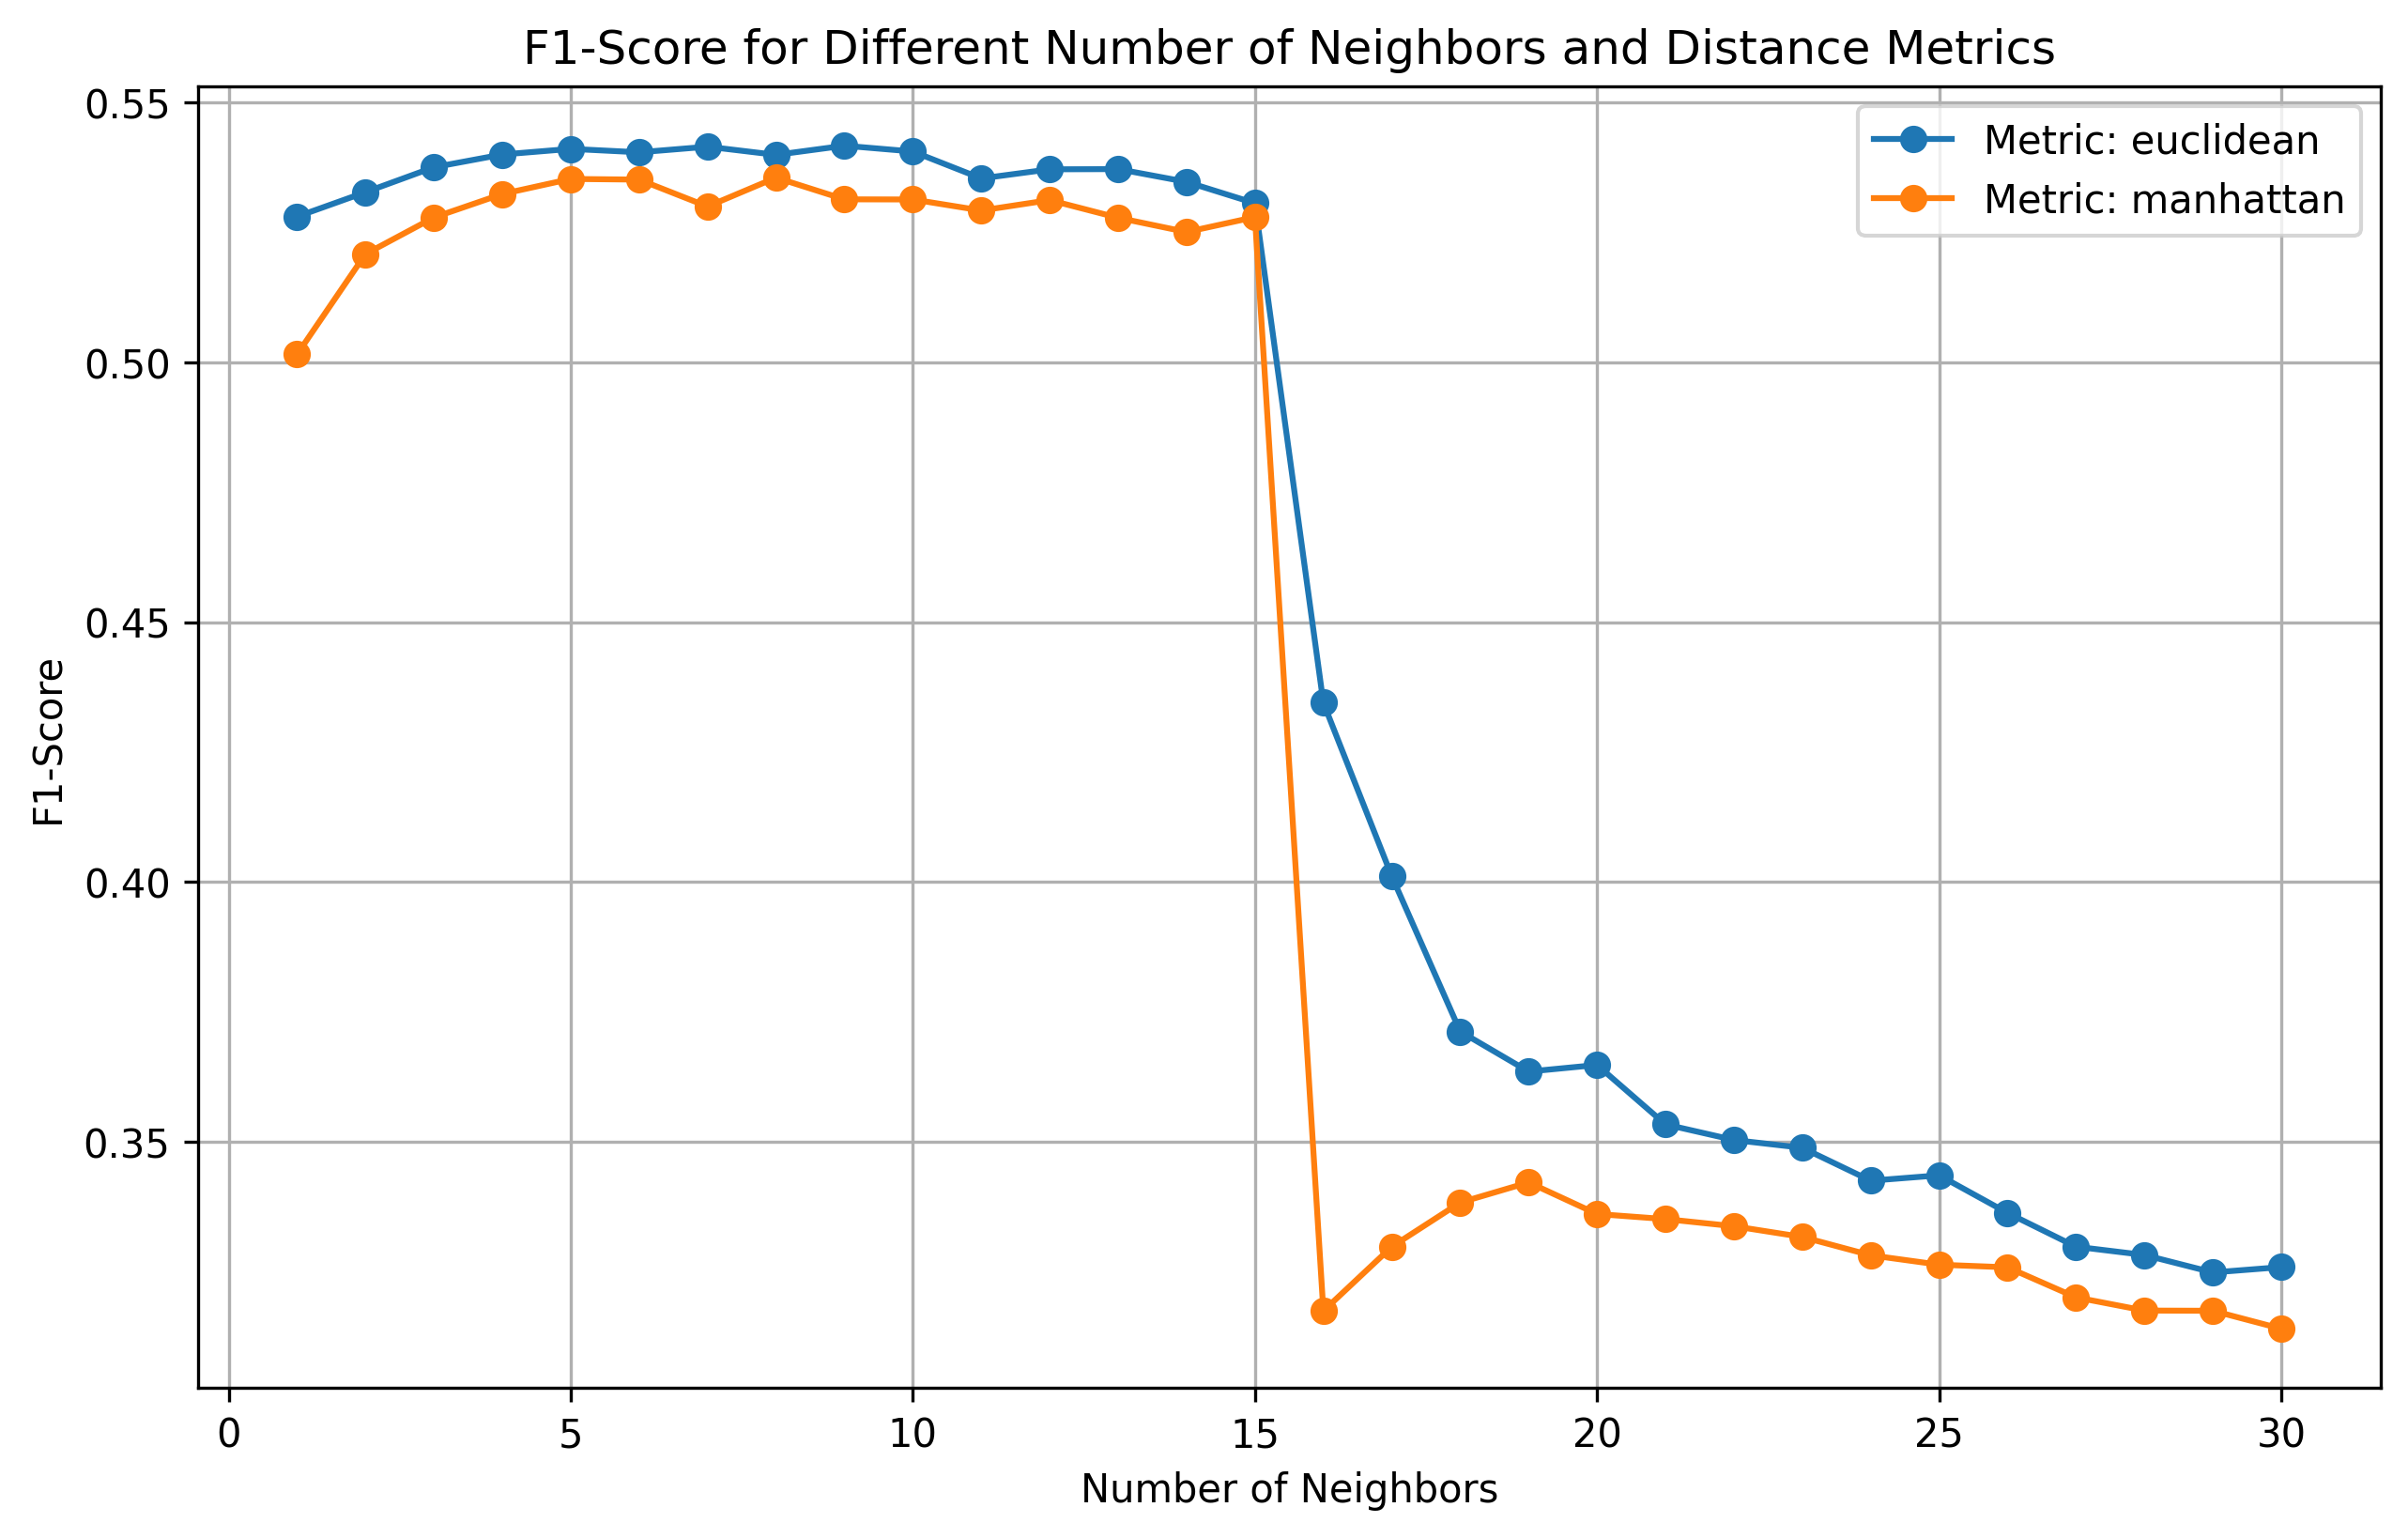

In [ ]:
# plotting scores for different n_neighbors with different metrics
mean_test_scores = results['mean_test_score']

# reshape results for plotting scores against `n_neighbors`
scores_matrix = mean_test_scores.reshape(len(knn_param_grid['n_neighbors']), len(knn_param_grid['metric']))

plt.figure(figsize=(10, 6), dpi=300)

# for each number of neighbours and distance metric, plot average CV score
for i, metric in enumerate(knn_param_grid['metric']):
    plt.plot(knn_param_grid['n_neighbors'], scores_matrix[:, i], label=f'Metric: {metric}', marker='o')

plt.title('F1-Score for Different Number of Neighbors and Distance Metrics')
plt.xlabel('Number of Neighbors')
plt.ylabel('F1-Score')
plt.legend()

plt.grid(True)
plt.show()

In [75]:
# predict on the test set using best model
# label
knn_y_pred_test = knn_best_model.predict(X_test_scaled)
# probability
knn_y_pred_proba_test = knn_best_model.predict_proba(X_test)[:, 1]

# print evaluation metrics
evaluate_model(y_test, knn_y_pred_test, knn_y_pred_proba_test)

Accuracy: 0.7187
Balanced Accuracy: 0.6733
AUC: 0.6256
F1 Score: 0.5613


In [ ]:
# K-NN PCA Data

# same parameter grid
# same model
# same scoring function 

# initialize GridSearchCV with 10-fold cross-validation for svd solver
grid_search_knn_pca = GridSearchCV(estimator=knn_model, 
                           param_grid=knn_param_grid, 
                           cv=10, 
                           scoring=scoring,
                           refit='f1',
                           return_train_score=True)

# fit grid search to training data
grid_search_knn_pca.fit(X_train_pca, y_train)

# extract cross-validation results
pca_results = grid_search_knn.cv_results_

# select and save best model
knn_pca_best_model = grid_search_knn_pca.best_estimator_

print(f"KNN PCA - Best parameters: {grid_search_knn_pca.best_params_}")
print(f"KNN PCA - Best score: {grid_search_knn_pca.best_score_}")

KNN PCA - Best parameters: {'metric': 'euclidean', 'n_neighbors': 5}
KNN PCA - Best score: 0.9041155462599029


In [ ]:
eval_cv(grid_search_knn_pca)

Mean Accuracy: 0.9310
Mean Balanced Accuracy: 0.9161
Mean AUC: 0.9678
Mean F1 Score: 0.9045


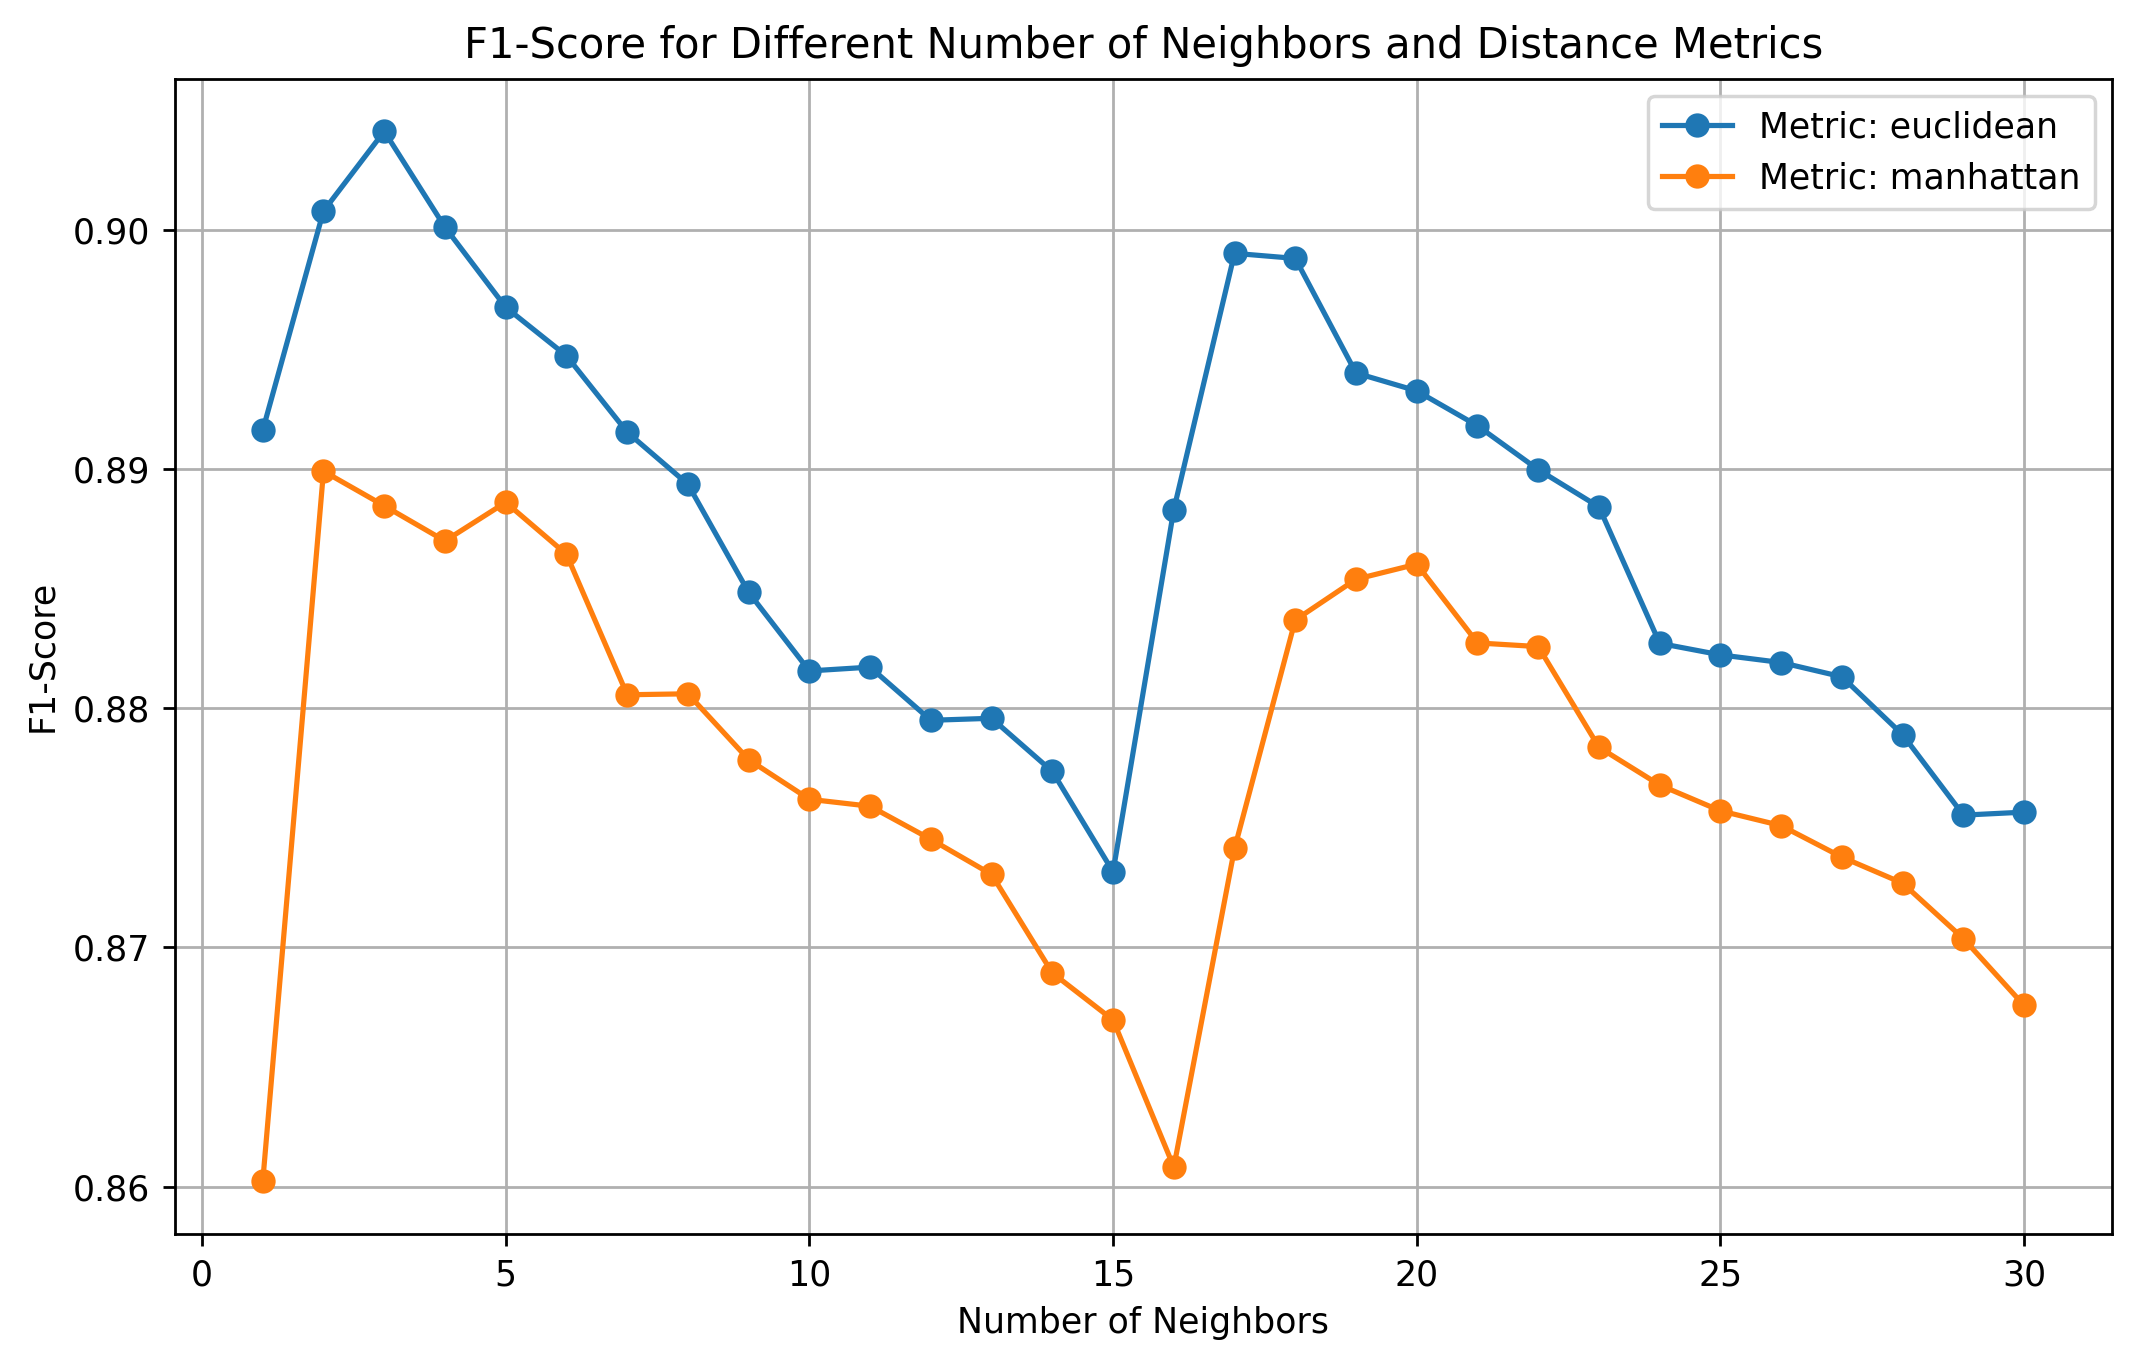

In [ ]:
# plotting scores for different n_neighbors with different metrics
mean_test_scores = pca_results['mean_test_score']

# reshape results for plotting
scores_matrix = mean_test_scores.reshape(len(knn_param_grid['n_neighbors']), len(knn_param_grid['metric']))

plt.figure(figsize=(10, 6), dpi=250)

# for each number of neighbours and distance metric, plot average CV score
for i, metric in enumerate(knn_param_grid['metric']):
    plt.plot(knn_param_grid['n_neighbors'], scores_matrix[:, i], label=f'Metric: {metric}', marker='o')

plt.title('F1-Score for Different Number of Neighbors and Distance Metrics')
plt.xlabel('Number of Neighbors')
plt.ylabel('F1-Score')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
# predict on the test set using best model
# label
knn_pca_y_pred_test = knn_pca_best_model.predict(X_test_pca)
# probability
knn_pca_y_pred_proba_test = knn_pca_best_model.predict_proba(X_test_pca)[:, 1]

# print evaluation metrics
evaluate_model(y_test, knn_pca_y_pred_test, knn_pca_y_pred_proba_test)

Accuracy: 0.9324
Balanced Accuracy: 0.9215
AUC: 0.9664
F1 Score: 0.9106


5. GBDT:

In [ ]:
### GBDT - initialization

# options for hyperparameters
gbdt_param_grid = {
    # number of boosting stages to perform
    'n_estimators': [200, 300, 500],
    # shrinks the contribution of each tree
    'learning_rate': [0.05, 0.1],
    # limits number of tree nodes
    'max_depth': [3, 5, 7],
    # minimum number of samples required to split an internal node
    'min_samples_split': [5, 10],
    # minimum number of samples required to be at a leaf node
    'min_samples_leaf': [2, 4]}

# initialize model
gbdt_model = GradientBoostingClassifier(random_state=443,
                                        # for early stopping if adding more trees doesn't improve performance
                                        warm_start=True,
                                        tol=0.001,
                                        n_iter_no_change=10)

In [ ]:
# GBDT - Original Data

# same parameter grid
# same model
# same scoring function 

# initialize GridSearchCV with 10-fold cross-validation
grid_search_gbdt = GridSearchCV(estimator=gbdt_model, 
                           param_grid=gbdt_param_grid, 
                           cv=10, 
                           scoring=scoring,
                           refit='f1', 
                           return_train_score=True,
                           verbose=1,
                           # using all processors to run jobs in parellel
                           n_jobs=-1)

# fit grid search to training data
grid_search_gbdt.fit(X_train_scaled, y_train)

# select and save best model
gbdt_best_model = grid_search_gbdt.best_estimator_

print(f"GBDT Original - Best parameters: {grid_search_gbdt.best_params_}")
print(f"GBDT Original - Best score: {grid_search_gbdt.best_score_}")

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 7.1min
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 7.6min
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 7.6min
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 7.6min
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 7.6min
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 7.6min
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 7.6min
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 7.6min
[CV] END learning_rate=0.05, max_depth=3

In [ ]:
# GBDT - Original Data

# same parameter grid
# same model
# same scoring function 

# initialize GridSearchCV with 10-fold cross-validation
grid_search_gbdt = GridSearchCV(estimator=gbdt_model, 
                           param_grid=gbdt_param_grid, 
                           cv=10, 
                           scoring=scoring,
                           refit='f1', 
                           return_train_score=True,
                           verbose=1,
                           # using all processors to run jobs in parellel
                           n_jobs=-1)

# fit grid search to training data
grid_search_gbdt.fit(X_train_scaled, y_train)

# select and save best model
gbdt_best_model = grid_search_gbdt.best_estimator_

print(f"GBDT Original - Best parameters: {grid_search_gbdt.best_params_}")
print(f"GBDT Original - Best score: {grid_search_gbdt.best_score_}")

Fitting 10 folds for each of 72 candidates, totalling 720 fits
GBDT Original - Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}
GBDT Original - Best score: 0.9346500063648184


In [ ]:
eval_cv(grid_search_gbdt)

Mean Accuracy: 0.9511
Mean Balanced Accuracy: 0.9435
Mean AUC: 0.9888
Mean F1 Score: 0.9347


In [105]:
# predict on the test set using best model
# label
gbdt_y_pred_test = gbdt_best_model.predict(X_test_scaled)
# probability
gbdt_y_pred_proba_test = gbdt_best_model.predict_proba(X_test_scaled)[:, 1]

# print evaluation metrics
evaluate_model(y_test, gbdt_y_pred_test, gbdt_y_pred_proba_test)

Accuracy: 0.9543
Balanced Accuracy: 0.9495
AUC: 0.9917
F1 Score: 0.9415


In [ ]:
# GBDT - PCA Data

# same parameter grid
# same model
# same scoring function 

# initialize GridSearchCV with 10-fold cross-validation
grid_search_gbdt_pca = GridSearchCV(estimator=gbdt_model, 
                           param_grid=gbdt_param_grid, 
                           cv=10, 
                           scoring=scoring,
                           refit='f1', 
                           return_train_score=True,
                           verbose=1,
                           n_jobs=-1)

# fit grid search to training data
grid_search_gbdt_pca.fit(X_train_pca, y_train)

# select and save best model
gbdt_pca_best_model = grid_search_gbdt_pca.best_estimator_

print(f"GBDT PCA - Best parameters: {grid_search_gbdt_pca.best_params_}")
print(f"GBDT PCA - Best score: {grid_search_gbdt_pca.best_score_}")

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
GBDT Original - Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
GBDT Original - Best score: 0.9195893294725682


In [ ]:
eval_cv(grid_search_gbdt_pca)

Mean Accuracy: 0.9394
Mean Balanced Accuracy: 0.9296
Mean AUC: 0.9846
Mean F1 Score: 0.9184


In [79]:
# predict on the test set using best model
# label
gbdt_pca_y_pred_test = gbdt_pca_best_model.predict(X_test_pca)
# probability
gbdt_pca_y_pred_proba_test = gbdt_pca_best_model.predict_proba(X_test_pca)[:, 1]

# print evaluation metrics
evaluate_model(y_test, gbdt_pca_y_pred_test, gbdt_pca_y_pred_proba_test)

Accuracy: 0.9361
Balanced Accuracy: 0.9292
AUC: 0.9862
F1 Score: 0.9175


6. Random Forest:

In [ ]:
### Random Forest - initialization

# options for hyperparameters
rf_param_grid = {
    # number of tress
    'n_estimators': [200, 300, 500],
    # limits number of tree nodes
    'max_depth': [10, 20, 50],
    # minimum number of samples requires to split an internal node
    'min_samples_split': [2, 5, 10],
    # minimum number of samples required to be at a leaf node
    'min_samples_leaf': [2, 4]}

# initialize model
rf_model = RandomForestClassifier(random_state=443)

In [ ]:
# RF - Original Data

# same scoring function 

# initialize GridSearchCV with 10-fold cross-validation for svd solver
grid_search_rf = GridSearchCV(estimator=rf_model, 
                           param_grid=rf_param_grid, 
                           cv=10, 
                           scoring=scoring,
                           refit='f1', 
                           return_train_score=True, 
                           verbose=2,
                           # parallelization
                           n_jobs=-1)

# fit grid search to training data
grid_search_rf.fit(X_train_scaled, y_train)

# select and save best model
rf_best_model = grid_search_rf.best_estimator_

print(f"RF Original - Best parameters: {grid_search_rf.best_params_}")
print(f"RF Original - Best score: {grid_search_rf.best_score_}")

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  13.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  13.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  13.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  13.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  13.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  14.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; tota

In [ ]:
eval_cv(grid_search_rf)

Mean Accuracy: 0.9383
Mean Balanced Accuracy: 0.9223
Mean AUC: 0.9883
Mean F1 Score: 0.9139


In [90]:
# predict on the test set using best model
# label
rf_y_pred_test = rf_best_model.predict(X_test_scaled)
# probability
rf_y_pred_proba_test = rf_best_model.predict_proba(X_test_scaled)[:, 1]

# print evaluation metrics
evaluate_model(y_test, rf_y_pred_test, rf_y_pred_proba_test)

Accuracy: 0.9397
Balanced Accuracy: 0.9275
AUC: 0.9917
F1 Score: 0.9195


In [ ]:
# RF - PCA Data

# same parameter grid
# same model
# same scoring function 

# initialize GridSearchCV with 10-fold cross-validation for svd solver
grid_search_rf_pca = GridSearchCV(estimator=rf_model, 
                           param_grid=rf_param_grid, 
                           cv=10, 
                           scoring=scoring,
                           refit='f1', 
                           return_train_score=True, 
                           verbose=1,
                           n_jobs=-1)

# fit grid search to training data
grid_search_rf_pca.fit(X_train_pca, y_train)

# select and save best model
rf_pca_best_model = grid_search_rf_pca.best_estimator_

print(f"RF PCA - Best parameters: {grid_search_rf_pca.best_params_}")
print(f"RF PCA - Best score: {grid_search_rf_pca.best_score_}")

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; tota

In [ ]:
eval_cv(grid_search_rf_pca)

Mean Accuracy: 0.9367
Mean Balanced Accuracy: 0.9272
Mean AUC: 0.9817
Mean F1 Score: 0.9149


In [82]:
# predict on the test set using best model
# label
rf_pca_y_pred_test = rf_pca_best_model.predict(X_test_pca)
# probability
rf_pca_y_pred_proba_test = rf_pca_best_model.predict_proba(X_test_pca)[:, 1]

# print evaluation metrics
evaluate_model(y_test, rf_pca_y_pred_test, rf_pca_y_pred_proba_test)

Accuracy: 0.9306
Balanced Accuracy: 0.9239
AUC: 0.9836
F1 Score: 0.9106


In [ ]:
# access feature importances
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_best_model.feature_importances_})

# sort by importance
sorted_feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
print(sorted_feature_importance_rf)

     Feature  Importance
3102    IL7R    0.036148
1905   IL2RA    0.018477
3853    LAYN    0.018381
1443   DUSP4    0.018255
180    FOXP3    0.015749
...      ...         ...
1478   MRPS2    0.000000
3672  NHLRC3    0.000000
3768    SVIP    0.000000
3794   TTC37    0.000000
4068   CEP95    0.000000

[4123 rows x 2 columns]


7. SVM:

In [ ]:
### SVM - initialization

# options for hyperparameters
svm_param_grid = {
    # regularization parameter - a lower C will encourage a larger margin
    'C': [0.1, 1, 10],
    # linear and rbf kernels
    'kernel': ['linear', 'rbf'],
    # gamma for 'rbf' kernel - defines how far the influence of a single training example reaches
    'gamma': ['scale', 'auto'],
    # shrinking heuristic
    'shrinking': [True, False]}

# initializing the model
svm_model = SVC(random_state=443, probability=True)

In [ ]:
# SVM - Original Data

# same scoring function

grid_search_svm = GridSearchCV(estimator=svm_model, 
                           param_grid=svm_param_grid, 
                           scoring=scoring,
                           refit='f1',
                           cv=10,
                           verbose=2,
                           n_jobs=-1)

# fit grid search to training data
grid_search_svm.fit(X_train_scaled, y_train)

# select and save best model
svm_best_model = grid_search_svm.best_estimator_

print(f"SVM Original - Best parameters: {grid_search_svm.best_params_}")
print(f"SVM Original - Best score: {grid_search_svm.best_score_}")

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] END ..C=0.1, gamma=scale, kernel=linear, shrinking=True; total time= 2.4min
[CV] END ..C=0.1, gamma=scale, kernel=linear, shrinking=True; total time= 2.4min
[CV] END ..C=0.1, gamma=scale, kernel=linear, shrinking=True; total time= 2.4min
[CV] END ..C=0.1, gamma=scale, kernel=linear, shrinking=True; total time= 2.4min
[CV] END ..C=0.1, gamma=scale, kernel=linear, shrinking=True; total time= 2.5min
[CV] END ..C=0.1, gamma=scale, kernel=linear, shrinking=True; total time= 2.5min
[CV] END ..C=0.1, gamma=scale, kernel=linear, shrinking=True; total time= 2.5min
[CV] END ..C=0.1, gamma=scale, kernel=linear, shrinking=True; total time= 2.5min
[CV] END ..C=0.1, gamma=scale, kernel=linear, shrinking=True; total time= 2.3min
[CV] END .C=0.1, gamma=scale, kernel=linear, shrinking=False; total time= 2.3min
[CV] END ..C=0.1, gamma=scale, kernel=linear, shrinking=True; total time= 2.4min
[CV] END .C=0.1, gamma=scale, kernel=linear, s

In [ ]:
eval_cv(grid_search_svm)

Mean Accuracy: 0.9532
Mean Balanced Accuracy: 0.9427
Mean AUC: 0.9915
Mean F1 Score: 0.9364


In [108]:
# predict on the test set using best model
# label
svm_y_pred_test = svm_best_model.predict(X_test_scaled)
# probability
svm_y_pred_proba_test = svm_best_model.predict_proba(X_test_scaled)[:, 1]

# print evaluation metrics
evaluate_model(y_test, svm_y_pred_test, svm_y_pred_proba_test)

Accuracy: 0.9626
Balanced Accuracy: 0.9575
AUC: 0.9936
F1 Score: 0.9518


In [ ]:
# SVM - PCA Data

# same scoring function

grid_search_svm_pca = GridSearchCV(estimator=svm_model, 
                           param_grid=svm_param_grid, 
                           scoring=scoring,
                           refit='f1',
                           cv=10,
                           verbose=1)

# fit grid search to training data
grid_search_svm_pca.fit(X_train_pca, y_train)

# select and save best model
svm_pca_best_model = grid_search_svm_pca.best_estimator_

print(f"SVM PCA - Best parameters: {grid_search_svm_pca.best_params_}")
print(f"SVM PCA - Best score: {grid_search_svm_pca.best_score_}")

Fitting 10 folds for each of 24 candidates, totalling 240 fits
SVM PCA - Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}
SVM PCA - Best score: 0.9387839612201645


In [ ]:
eval_cv(grid_search_svm_pca)

Mean Accuracy: 0.9532
Mean Balanced Accuracy: 0.9478
Mean AUC: 0.9894
Mean F1 Score: 0.9381


In [88]:
# predict on the test set using best model
# label
svm_pca_y_pred_test = svm_pca_best_model.predict(X_test_pca)
# probability
svm_pca_y_pred_proba_test = svm_pca_best_model.predict_proba(X_test_pca)[:, 1]

# print evaluation metrics
evaluate_model(y_test, svm_pca_y_pred_test, svm_pca_y_pred_proba_test)

Accuracy: 0.9562
Balanced Accuracy: 0.9542
AUC: 0.9910
F1 Score: 0.9447


ROC Curves:

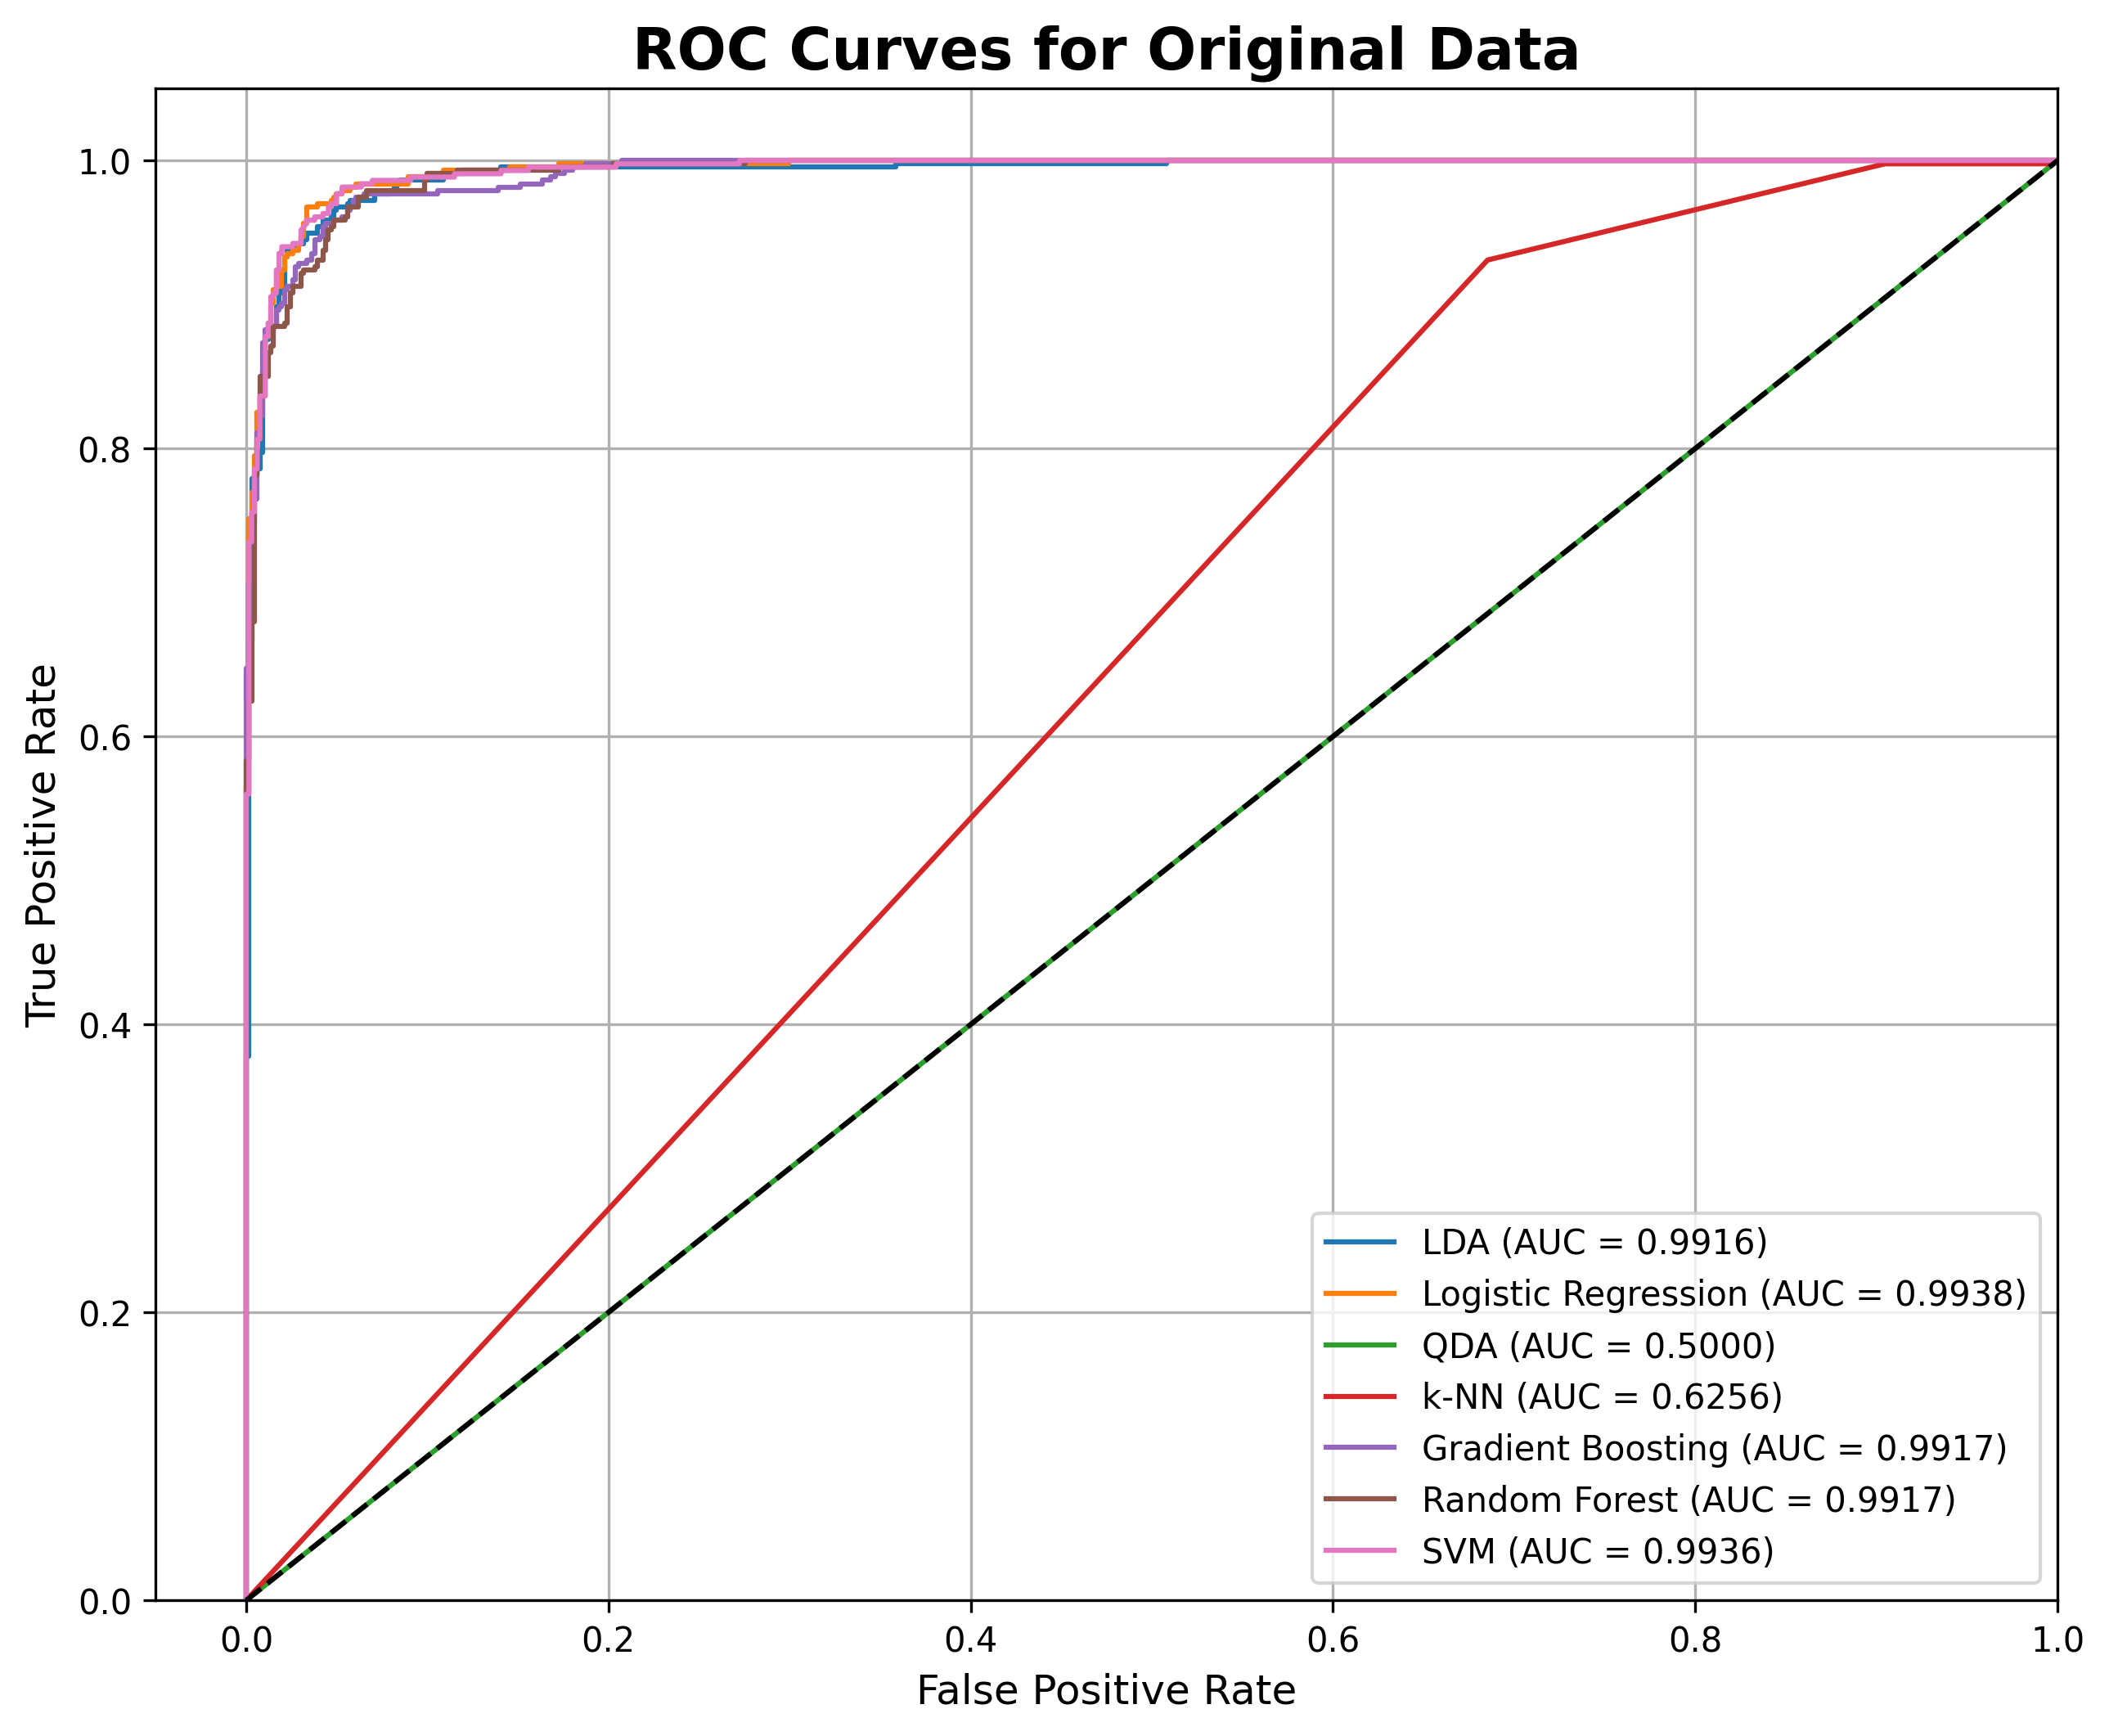

In [112]:
# dictionary with classifiers' predicted probabilities for original data
classifiers_og = {
    "LDA": lda_y_pred_proba_test,
    "Logistic Regression": lr_y_pred_proba_test,
    "QDA": qda_y_pred_proba_test,
    "k-NN": knn_y_pred_proba_test,
    "Gradient Boosting": gbdt_y_pred_proba_test,
    "Random Forest": rf_y_pred_proba_test,
    "SVM": svm_y_pred_proba_test}

# plotting ROC curves for original data
plot_all_roc_curves(classifiers_og, y_test, "Original")

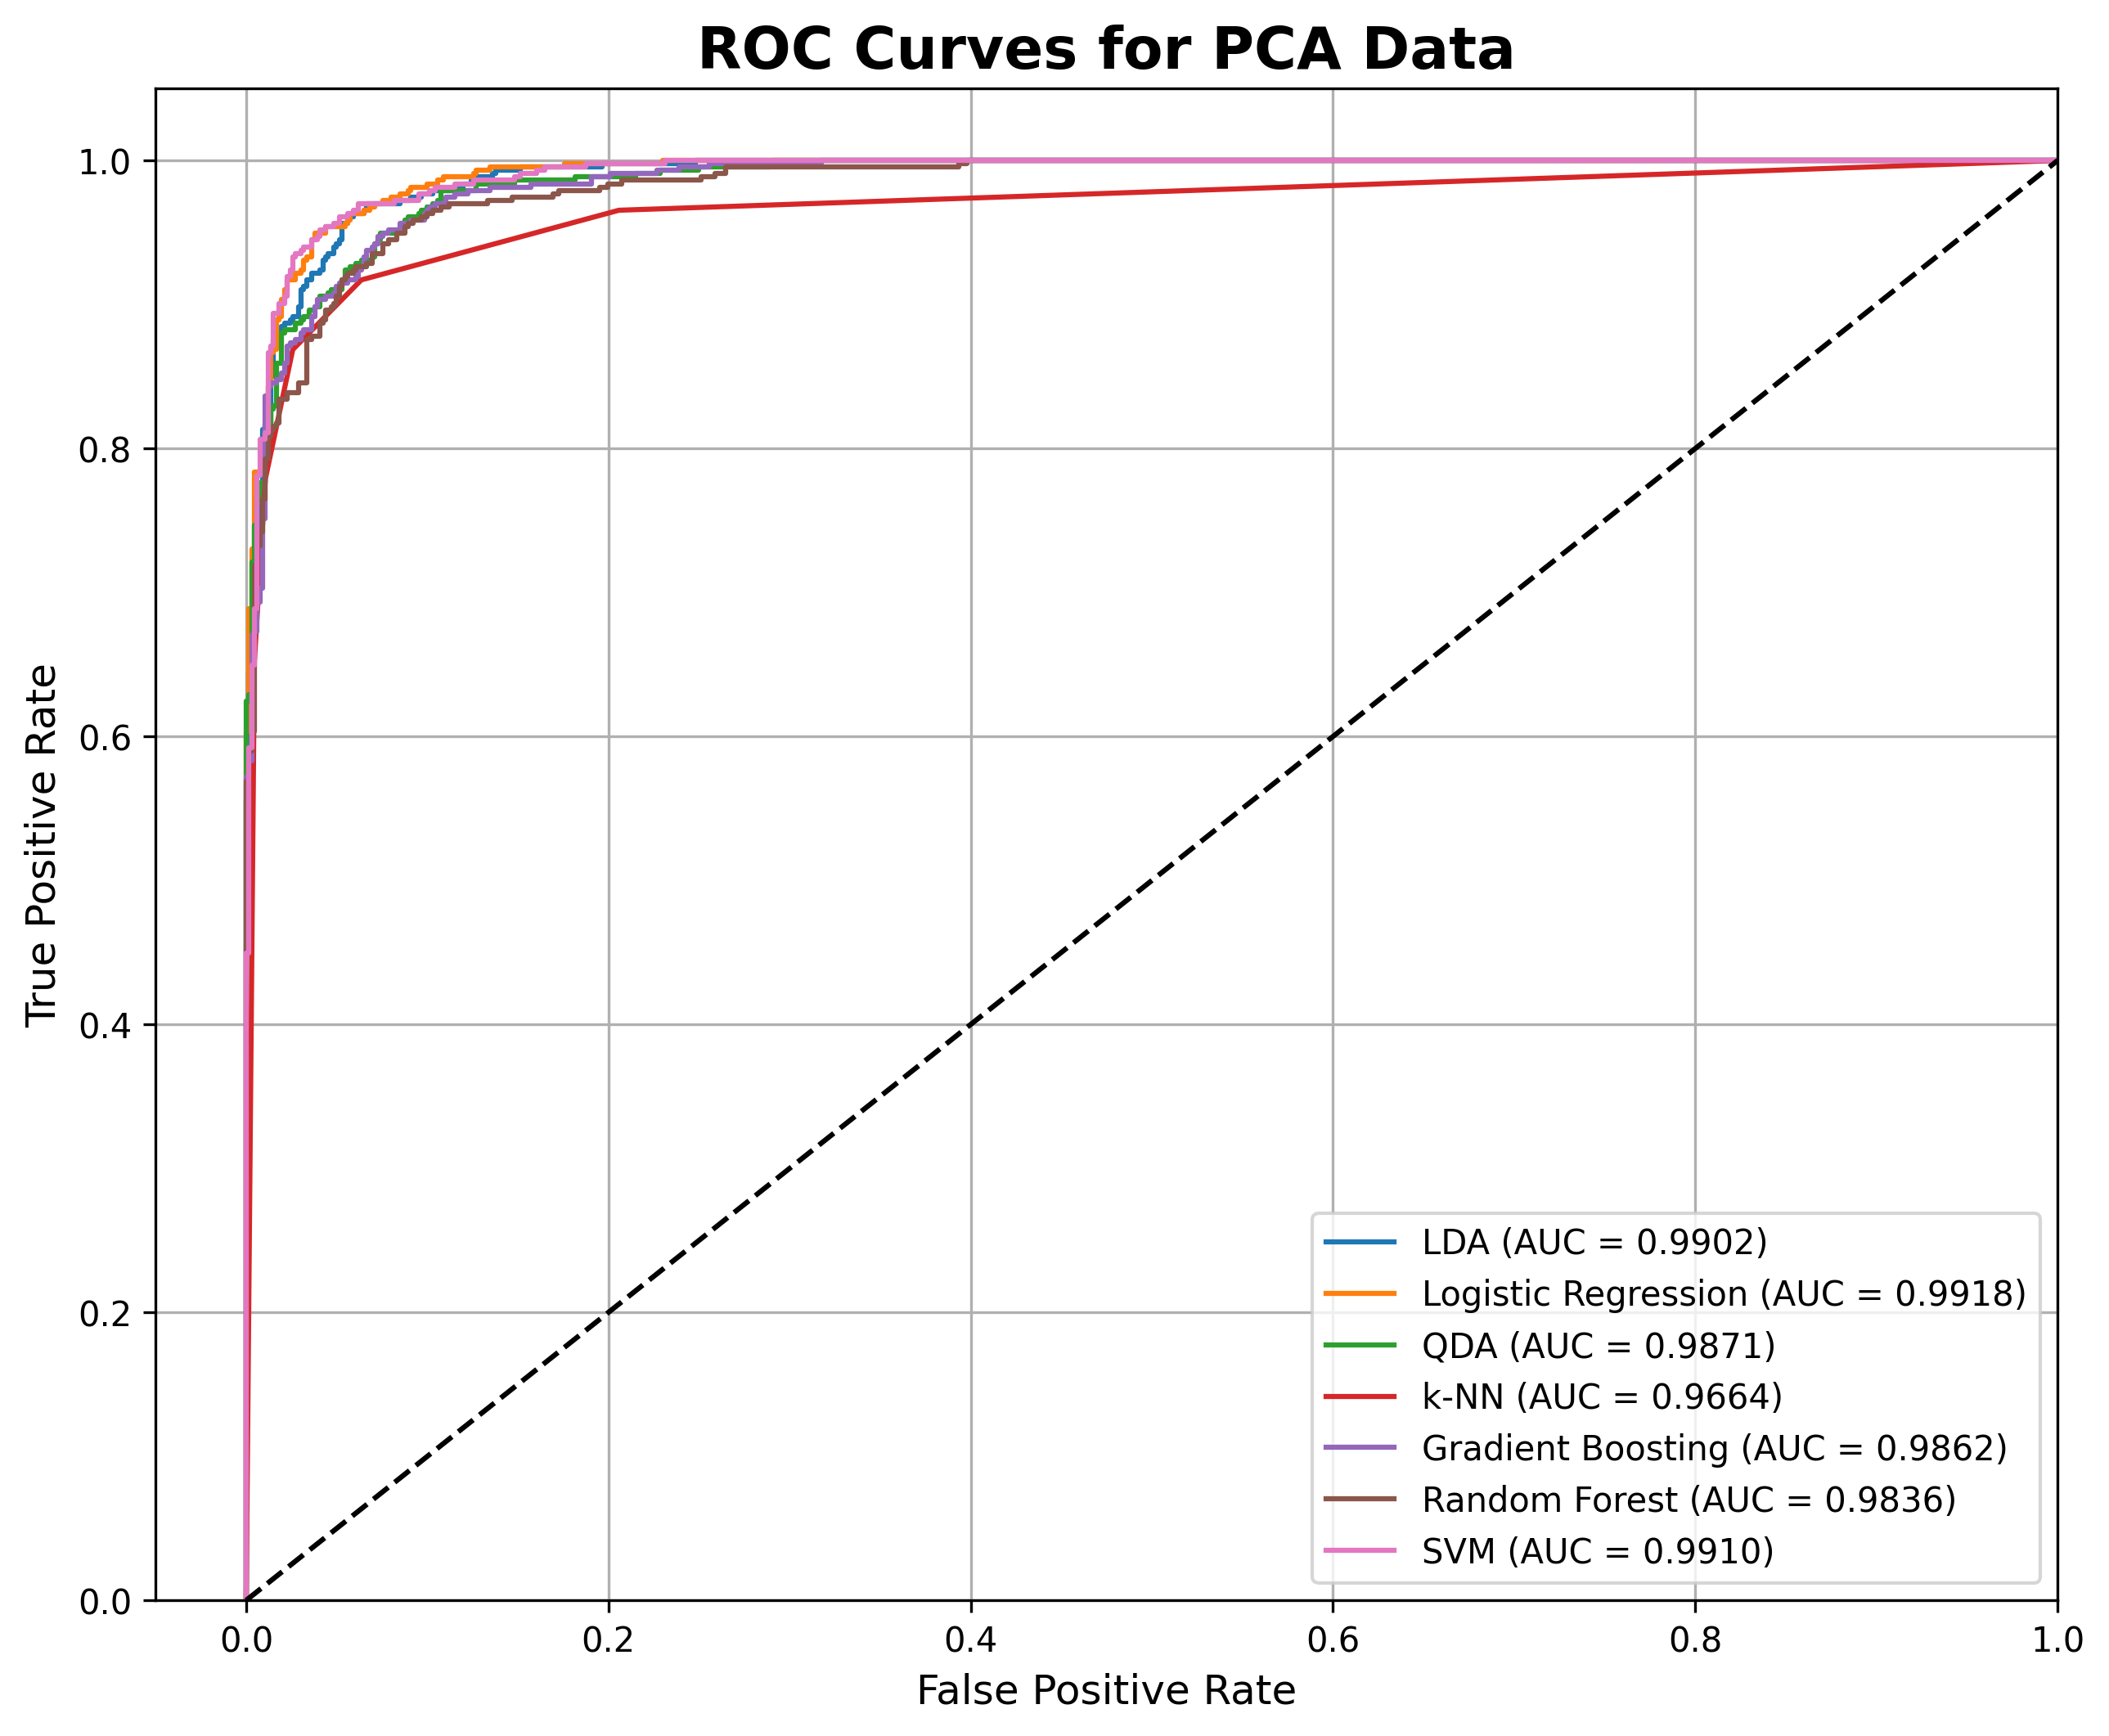

In [97]:
# dictionary with classifiers' predicted probabilities for PCA data
classifiers_pca = {
    "LDA": lda_pca_y_pred_proba_test,
    "Logistic Regression": lr_pca_y_pred_proba_test,
    "QDA": qda_pca_y_pred_proba_test,
    "k-NN": knn_pca_y_pred_proba_test,
    "Gradient Boosting": gbdt_pca_y_pred_proba_test,
    "Random Forest": rf_pca_y_pred_proba_test,
    "SVM": svm_pca_y_pred_proba_test}

# plotting ROC curves for PCA data
plot_all_roc_curves(classifiers_pca, y_test, "PCA")

**T1.3** Train and evaluate three classifiers of your choice with the goal of improving the F1 score. You may use any classifier or combination of methods covered in the course, including those listed in **T1.2**, as well as methods like bagging, boosting, and regularisation.

In [ ]:
# importing classifiers
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import KFold, cross_validate

1. Elastic Net, XGBoost, LightGBM, FNN

In [ ]:
# initialize elastic net model
en_model = LogisticRegression(random_state=443, penalty='elasticnet', solver='saga')

# define parameter grid
en_param_grid = {
    # regularization strength
    'C': [0.001, 0.01, 0.1, 1],
    # ratio between l1 (lasso) and l2 (ridge) penalties
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

In [ ]:
# GridSearchCV with 10-fold cross-validation
grid_search_en = GridSearchCV(estimator=en_model, 
                              param_grid=en_param_grid, 
                              scoring=scoring,
                              refit='f1',
                              cv=10, 
                              verbose=2, 
                              n_jobs=-1)

# fit to training data
grid_search_en.fit(X_train_scaled, y_train)

# save best model from grid search
en_best_model = grid_search_en.best_estimator_

print(f"Best ElasticNet parameters: {grid_search_en.best_params_}")
print(f"Best ElasticNet score (F1): {grid_search_en.best_score_}")

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END ..............................C=0.001, l1_ratio=0.1; total time=   6.6s
[CV] END ..............................C=0.001, l1_ratio=0.1; total time=   7.0s
[CV] END ..............................C=0.001, l1_ratio=0.1; total time=   6.9s
[CV] END ..............................C=0.001, l1_ratio=0.1; total time=   7.1s
[CV] END ..............................C=0.001, l1_ratio=0.1; total time=   7.1s
[CV] END ..............................C=0.001, l1_ratio=0.1; total time=   7.1s
[CV] END ..............................C=0.001, l1_ratio=0.1; total time=   7.2s
[CV] END ..............................C=0.001, l1_ratio=0.1; total time=   7.5s
[CV] END ..............................C=0.001, l1_ratio=0.3; total time=   4.8s
[CV] END ..............................C=0.001, l1_ratio=0.3; total time=   4.8s
[CV] END ..............................C=0.001, l1_ratio=0.3; total time=   4.9s
[CV] END ..............................C=0.001

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.1; total time=  19.5s
[CV] END ...............................C=0.01, l1_ratio=0.1; total time=  19.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.1; total time=  20.2s
[CV] END ...............................C=0.01, l1_ratio=0.1; total time=  20.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.1; total time=  20.0s
[CV] END ...............................C=0.01, l1_ratio=0.1; total time=  19.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.1; total time=  20.2s
[CV] END ...............................C=0.01, l1_ratio=0.1; total time=  20.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.3; total time=  15.1s
[CV] END ...............................C=0.01, l1_ratio=0.3; total time=  15.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.3; total time=  15.2s
[CV] END ...............................C=0.01, l1_ratio=0.3; total time=  15.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.3; total time=  14.9s
[CV] END ...............................C=0.01, l1_ratio=0.3; total time=  14.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.1; total time=  19.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.1; total time=  19.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.3; total time=  15.3s
[CV] END ...............................C=0.01, l1_ratio=0.3; total time=  15.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.3; total time=  15.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.3; total time=  15.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.5; total time=  14.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.5; total time=  14.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.5; total time=  14.7s
[CV] END ...............................C=0.01, l1_ratio=0.5; total time=  14.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.5; total time=  14.9s
[CV] END ...............................C=0.01, l1_ratio=0.5; total time=  15.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.5; total time=  15.2s
[CV] END ...............................C=0.01, l1_ratio=0.5; total time=  14.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.5; total time=  14.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.7; total time=  14.4s
[CV] END ...............................C=0.01, l1_ratio=0.5; total time=  14.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.7; total time=  14.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.7; total time=  14.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.7; total time=  14.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.7; total time=  14.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.7; total time=  14.6s
[CV] END ...............................C=0.01, l1_ratio=0.7; total time=  13.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.7; total time=  14.6s
[CV] END ...............................C=0.01, l1_ratio=0.7; total time=  14.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.7; total time=  14.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.9; total time=  14.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.9; total time=  14.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.9; total time=  14.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.9; total time=  14.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.9; total time=  14.2s
[CV] END ...............................C=0.01, l1_ratio=0.9; total time=  13.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.9; total time=  14.4s
[CV] END ...............................C=0.01, l1_ratio=0.9; total time=  14.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.9; total time=  14.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................C=0.01, l1_ratio=0.9; total time=  14.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.1; total time=  25.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.1; total time=  25.2s
[CV] END ................................C=0.1, l1_ratio=0.1; total time=  25.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.1; total time=  25.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.1; total time=  25.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.1; total time=  25.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.1; total time=  25.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.1; total time=  25.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.3; total time=  21.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.3; total time=  21.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.3; total time=  21.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.3; total time=  21.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.1; total time=  25.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.1; total time=  25.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.3; total time=  21.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.3; total time=  21.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.3; total time=  21.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.3; total time=  21.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.3; total time=  21.5s
[CV] END ................................C=0.1, l1_ratio=0.5; total time=  19.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.3; total time=  21.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.5; total time=  19.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.5; total time=  19.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.5; total time=  19.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.5; total time=  19.3s
[CV] END ................................C=0.1, l1_ratio=0.5; total time=  19.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.5; total time=  19.1s
[CV] END ................................C=0.1, l1_ratio=0.5; total time=  19.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.5; total time=  19.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.5; total time=  19.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.7; total time=  18.1s
[CV] END ................................C=0.1, l1_ratio=0.7; total time=  18.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.7; total time=  18.3s
[CV] END ................................C=0.1, l1_ratio=0.7; total time=  18.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.7; total time=  18.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.7; total time=  18.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.7; total time=  18.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.7; total time=  18.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.7; total time=  17.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.7; total time=  18.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.9; total time=  17.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.9; total time=  17.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.9; total time=  17.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.9; total time=  17.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.9; total time=  17.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.9; total time=  17.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.9; total time=  17.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.9; total time=  17.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.9; total time=  18.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................C=0.1, l1_ratio=0.9; total time=  18.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.1; total time=  20.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.1; total time=  21.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.1; total time=  21.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.1; total time=  20.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.1; total time=  21.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.1; total time=  22.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.1; total time=  22.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.1; total time=  22.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.1; total time=  22.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.1; total time=  22.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.3; total time=  27.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.3; total time=  28.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.3; total time=  27.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.3; total time=  27.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.3; total time=  27.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.3; total time=  27.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.3; total time=  27.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.3; total time=  28.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.3; total time=  27.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.3; total time=  27.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.5; total time=  27.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.5; total time=  27.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.5; total time=  28.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.5; total time=  28.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.5; total time=  27.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.5; total time=  27.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.5; total time=  27.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.5; total time=  27.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.5; total time=  27.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.5; total time=  27.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.7; total time=  26.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.7; total time=  26.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.7; total time=  26.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.7; total time=  26.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.7; total time=  26.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.7; total time=  26.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.7; total time=  27.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.7; total time=  26.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.7; total time=  26.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.7; total time=  26.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.9; total time=  26.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.9; total time=  25.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.9; total time=  26.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.9; total time=  26.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.9; total time=  25.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.9; total time=  25.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.9; total time=  24.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.9; total time=  23.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.9; total time=  23.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.9; total time=  22.6s
Best ElasticNet parameters: {'C': 1, 'l1_ratio': 0.5}
Best ElasticNet score (F1): 0.9404585465863328


In [138]:
en = LogisticRegression(random_state=443, penalty='elasticnet', solver='saga', C=1, l1_ratio=0.5)

eval_model_with_cv(en, X_train_scaled, y_train)

# eval_cv(grid_search_en)

Mean Accuracy: 0.9545
Mean Balanced Accuracy: 0.9509
Mean AUC: 0.9912
Mean F1 Score: 0.9405


In [ ]:
# predict on the test set using the best model
    # labels
en_y_pred_test = en_best_model.predict(X_test_scaled)
    # probabilities
en_y_pred_proba_test = en_best_model.predict_proba(X_test_scaled)[:, 1]

# print evaluation metrics
evaluate_model(y_test, en_y_pred_test, en_y_pred_proba_test)

Accuracy: 0.9644
Balanced Accuracy: 0.9634
AUC: 0.9934
F1 Score: 0.9552


In [ ]:
# initialize mlp classifier model (feed-forward neural network)
mlp_model = MLPClassifier(random_state=443, early_stopping=True, n_iter_no_change=10)

# define parameter grid for MLPClassifier
mlp_param_grid = {
    # ith element represents the number of neurons in the ith hidden layer
    'hidden_layer_sizes': [(50,), (50, 50), (100, 50), (50, 50, 50), (100, 50, 50)],
    'activation': ['relu', 'tanh'],
    # strength of l2 regularization term
    'alpha': [0.0001, 0.001, 0.01]}

In [ ]:
# GridSearchCV with 10-fold cross-validation
grid_search_mlp = GridSearchCV(estimator=mlp_model, 
                               param_grid=mlp_param_grid, 
                               scoring='f1', 
                               cv=10, 
                               verbose=2, 
                               n_jobs=-1)

# fit to the training data
grid_search_mlp.fit(X_train_scaled, y_train)

# save best model from the grid search
mlp_best_model = grid_search_mlp.best_estimator_

print(f"Best MLP parameters: {grid_search_mlp.best_params_}")
print(f"Best MLP score (F1): {grid_search_mlp.best_score_}")

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), solver=adam; total time=   4.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), solver=adam; total time=   4.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), solver=adam; total time=   4.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), solver=adam; total time=   4.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), solver=adam; total time=   4.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), solver=adam; total time=   4.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), solver=adam; total time=   5.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), solver=adam; total time=   5.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), solver=adam; total time=   4.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer

In [ ]:
# predict on the test set using the best model
    # labels
mlp_y_pred_test = mlp_best_model.predict(X_test_scaled)
    # probabilities
mlp_y_pred_proba_test = mlp_best_model.predict_proba(X_test_scaled)[:, 1]

# evaluation metrics
evaluate_model(y_test, mlp_y_pred_test, mlp_y_pred_proba_test)

Accuracy: 0.9498
Balanced Accuracy: 0.9497
AUC: 0.9894
F1 Score: 0.9374


2. Voting Classifier

In [119]:
print("Agreement between LR and SVM:", np.mean(lr_y_pred_test == svm_y_pred_test))
print("Agreement between LR and LDA:", np.mean(lr_y_pred_test == lda_y_pred_test))
print("Agreement between SVM and LDA:", np.mean(svm_y_pred_test == lda_y_pred_test))

Agreement between LR and SVM: 0.9899543378995433
Agreement between LR and LDA: 0.9835616438356164
Agreement between SVM and LDA: 0.982648401826484


In [ ]:
lda_best_model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.5)
lr_best_model = LogisticRegression(C=0.001, class_weight='balanced', max_iter=100, penalty='l2', solver='saga')
svm_best_model = SVC(C=10, kernel='rbf', shrinking=True, probability=True)
gbdt_best_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, max_depth=3, min_samples_leaf=4, min_samples_split=10)

In [102]:
# voting classifier
# combine outputs of multiple classifiers (e.g., LDA, Logistic Regression, SVM and GBDT)
voting_clf = VotingClassifier(
        estimators=[
            ('lda', lda_best_model),
            ('lr', lr_best_model),
            # non linear structure
            ('svm', svm_best_model),
            # tree like structure
            ('gbdt', gbdt_best_model)],
        # predicts the class label based on the argmax of the sums of the predicted probabilities
        voting='soft')

In [144]:
kf = KFold(n_splits=10, shuffle=True, random_state=443)

# cross-validation with 10 folds
    # no hyperparameter tuning, just for error estimates
cv_results = cross_validate(voting_clf, X_train_scaled, y_train, 
                            cv=kf, scoring=scoring, 
                            return_train_score=False)

print(f"Mean Accuracy: {np.mean(cv_results['test_accuracy']):.4f}")
print(f"Mean Balanced Accuracy: {np.mean(cv_results['test_balanced_accuracy']):.4f}")
print(f"Mean AUC: {np.mean(cv_results['test_roc_auc']):.4f}")
print(f"Mean F1 Score: {np.mean(cv_results['test_f1']):.4f}")

Mean Accuracy: 0.9564
Mean Balanced Accuracy: 0.9499
Mean AUC: 0.9930
Mean F1 Score: 0.9421


In [ ]:
# fitting model on entire training dataset
    # since we're not using gridsearch, this is no longer done automatically
voting_clf.fit(X_train_scaled, y_train)

# predicting on test set
voting_y_pred_test = voting_clf.predict(X_test_scaled)
voting_y_pred_proba_test = voting_clf.predict_proba(X_test_scaled)[:, 1]

# print evaluation metrics
print('\n\nTest Set Metrics:\n')
evaluate_model(y_test, voting_y_pred_test, voting_y_pred_proba_test)



Test Set Metrics:

Accuracy: 0.9626
Balanced Accuracy: 0.9591
AUC: 0.9953
F1 Score: 0.9523


3. Stacking Classifier:

In [145]:
stack_ensemble = StackingClassifier(
    estimators=[('lr', lr_best_model), 
                ('svm', svm_best_model), 
                ('lda', lda_best_model),
                ('gbdt', gbdt_best_model)],
    # meta-model
    final_estimator=LogisticRegression(random_state=443))

In [146]:
kf = KFold(n_splits=10, shuffle=True, random_state=443)

# cross-validation with 10 folds
    # no hyperparameter tuning, just for error estimates
cv_results = cross_validate(stack_ensemble, X_train_scaled, y_train, 
                            cv=kf, scoring=scoring, 
                            return_train_score=False)

print(f"Mean Accuracy: {np.mean(cv_results['test_accuracy']):.4f}")
print(f"Mean Balanced Accuracy: {np.mean(cv_results['test_balanced_accuracy']):.4f}")
print(f"Mean AUC: {np.mean(cv_results['test_roc_auc']):.4f}")
print(f"Mean F1 Score: {np.mean(cv_results['test_f1']):.4f}")

Mean Accuracy: 0.9614
Mean Balanced Accuracy: 0.9577
Mean AUC: 0.9934
Mean F1 Score: 0.9493


In [147]:
# fitting model to training data
stack_ensemble.fit(X_train_scaled, y_train)

# predicting on the test set
stacking_y_pred_test = stack_ensemble.predict(X_test_scaled)
stacking_y_pred_proba_test = stack_ensemble.predict_proba(X_test_scaled)[:, 1]

# print evaluation metrics
print('\n\nTest Set Metrics:\n')
evaluate_model(y_test, stacking_y_pred_test, stacking_y_pred_proba_test)



Test Set Metrics:

Accuracy: 0.9653
Balanced Accuracy: 0.9633
AUC: 0.9953
F1 Score: 0.9561


**T1.4** Choose the best approach among those you have tested and implement your predictor as a function in your code.

Your code should include a function named mypredict(), which takes no input arguments. Your function should read in a compressed csv file named test.csv.gz from the working directory, which is in the same format as the provided data (data1.csv.gz). Your function should predict the class label of each row and return your prediction labels saved in a plain text file (one prediction label per line, in the same order as in the input file).

In [150]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [148]:
# predictions on test set are all performed after training each model

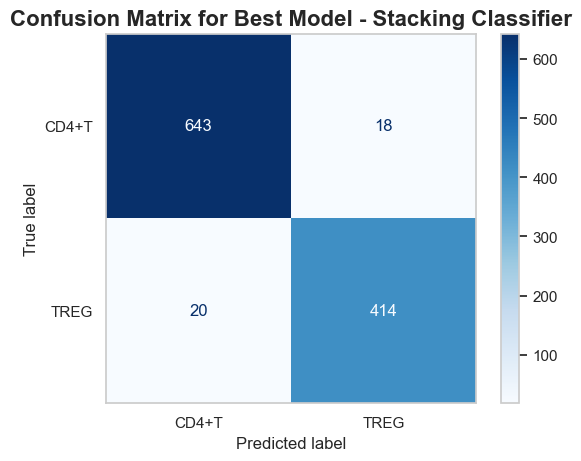

In [ ]:
# confusion matrix on test set for best model
cm = confusion_matrix(y_test, stacking_y_pred_test)

# plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['CD4+T', 'TREG'])
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix for Best Model - Stacking Classifier", fontsize=16, fontweight='bold')
plt.grid(False)
plt.show()

**Final Function:** Implementing Stacking Classifier

In [ ]:
# importing necessary packages
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# function to implement best predictor
def mypredict():
    # read in compressed file from the working directory
    test_data = pd.read_csv('test.csv.gz', compression='gzip')
    # read in training data
    train_data = pd.read_csv('data1.csv.gz', compression='gzip')
    
    # label encoding
    train_data['label'] = train_data['label'].map({'TREG': 1, 'CD4+T': 0})

    # define feature space and label variables
    X_train = train_data.drop(columns=['label'])
    y_train = train_data['label']

    # making sure the test data doesn't have a 'label' column
    X_test = test_data.drop(columns=['label']) if 'label' in test_data.columns else test_data

    # prepare data - scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # best model - stacking classifier
    stack_model = StackingClassifier(
    estimators=[('lr', LogisticRegression(C=0.001, class_weight='balanced', max_iter=100, 
                                          penalty='l2', solver='saga')), 
                ('svm', SVC(C=10, kernel='rbf', shrinking=True, probability=True)), 
                ('lda', LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.5)),
                ('gbdt', GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, 
                                                    max_depth=3, min_samples_leaf=4, 
                                                    min_samples_split=10))],
    # meta-model
    final_estimator=LogisticRegression(random_state=443))
    
    # train on data1 dataset
    stack_model.fit(X_train_scaled, y_train)
    
    # predict class labels
    predictions = stack_model.predict(X_test_scaled)

    # return prediction labels in a plain text file 
    with open('predictions.txt', 'w') as f:
        # one prediction per line, in the same order as the input file
        for prediction in predictions:
            f.write(f"{prediction}\n")